In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Read data
df = pd.read_csv('bank-additional-full.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [2]:
# missing data
missing = df.isnull().sum()
print(missing) # print count of missing value

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


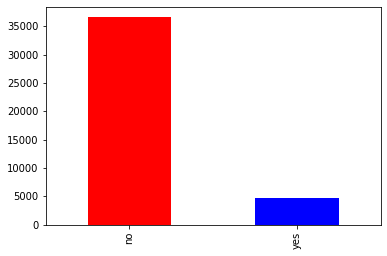

In [3]:
# Check the target variable
df['y'].value_counts().plot(kind = 'bar', color=['red', 'blue'])
plt.show()
#Need undersampling or over sampling

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


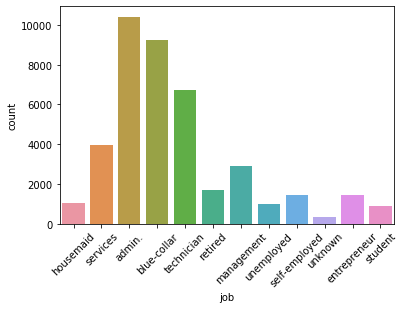

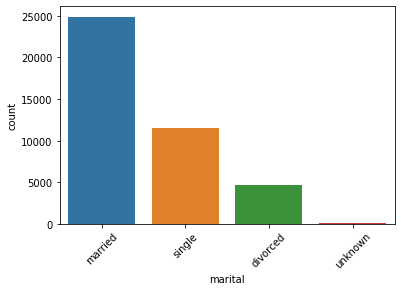

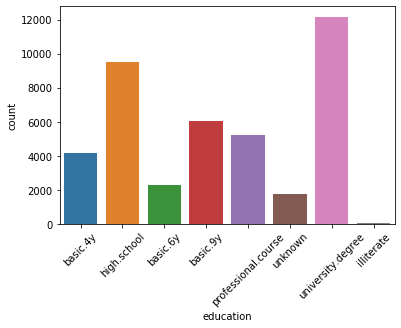

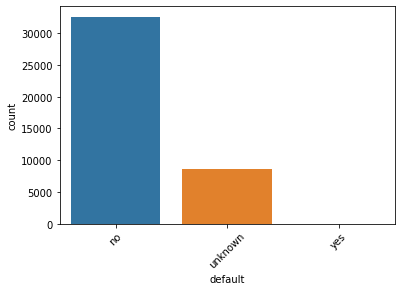

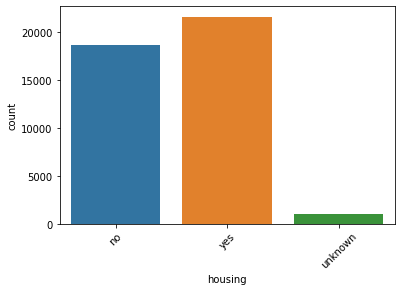

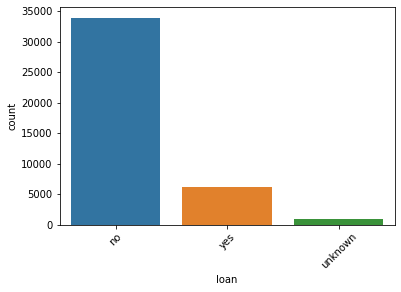

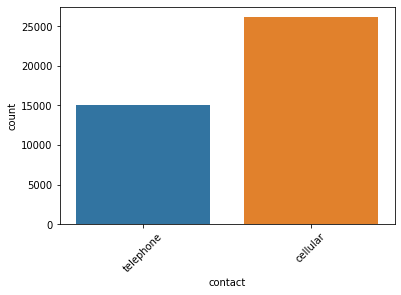

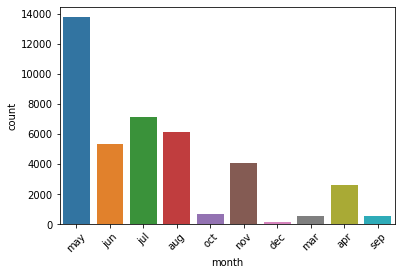

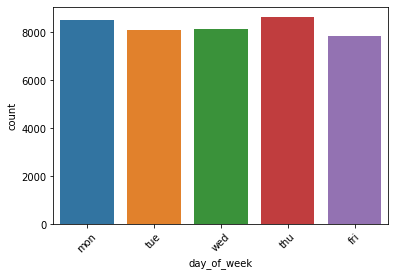

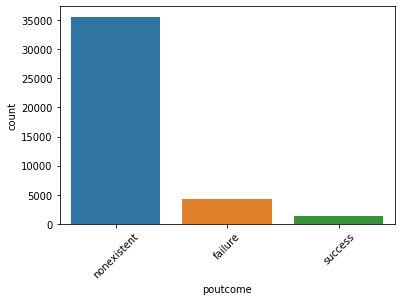

In [4]:
# Check the histogram of categorical data
category_feature = [col for col in df.columns if df[col].dtypes == 'object']
print(category_feature)

for col in category_feature:
    if col == 'y':
        continue
    sns.countplot(x=col,data=df)
    plt.xticks(rotation=45)
    plt.show()

['age', 'duration', 'campaign', 'pdays', 'previous', 'nr.employed']


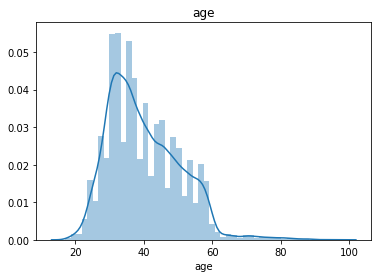

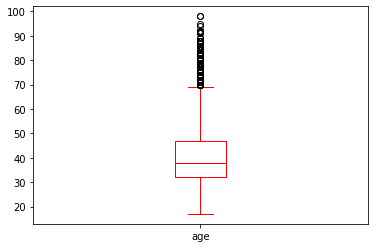

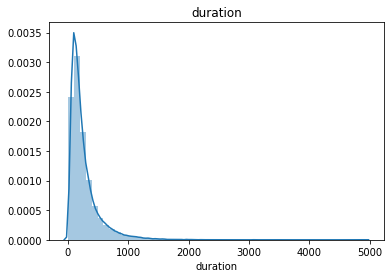

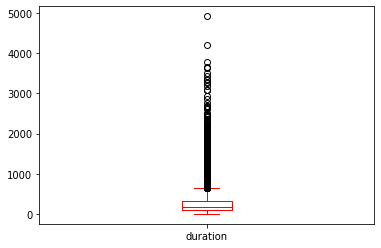

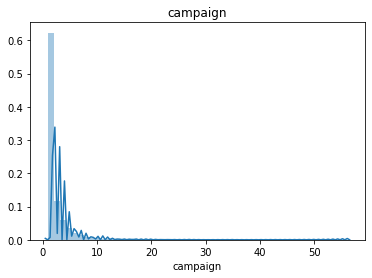

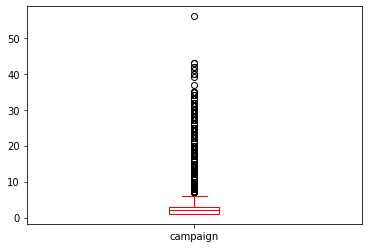

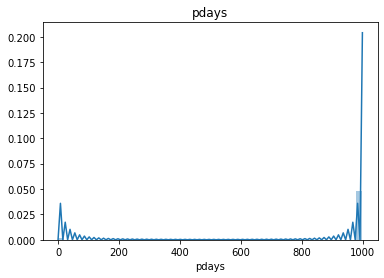

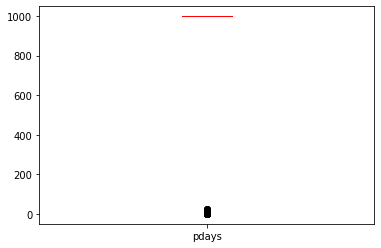

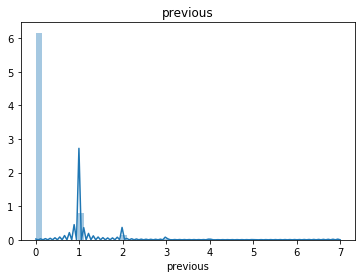

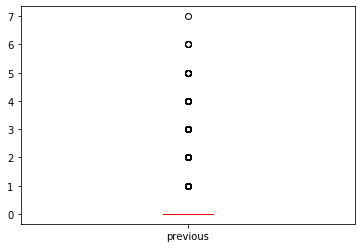

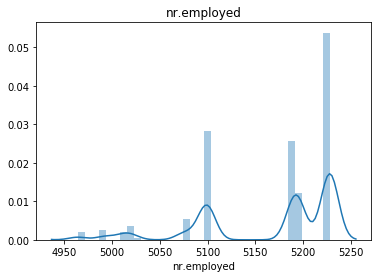

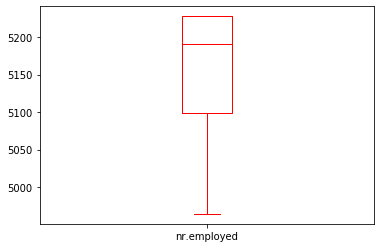

In [5]:

# Check the distribution and outliers of numerical data
numerical_feature = [col for col in df.columns if df[col].dtypes == 'int64']
print(numerical_feature)

def dist_box(df, feature_list):
    for col in feature_list:
        sns.distplot(df.loc[df[col].notnull(), col])
        plt.title(col)
        plt.show()

        df[col].plot(kind='box', color='red')
        plt.show()
        
dist_box(df, numerical_feature)

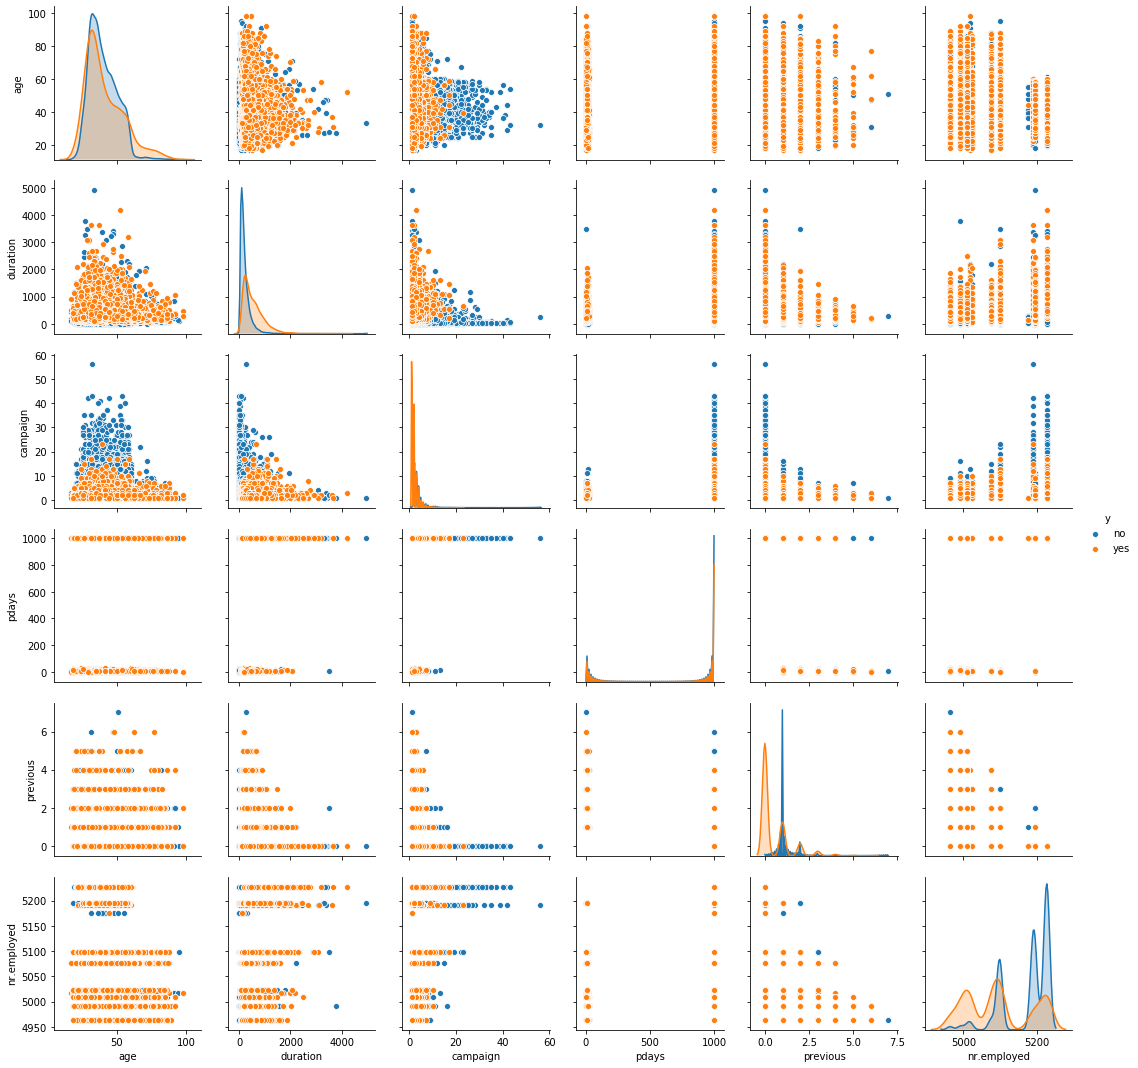

In [6]:

# Graphs the relationship between numerical data.
sns.pairplot(df[list(numerical_feature) + ['y']], hue = 'y'
                , x_vars = numerical_feature, y_vars = numerical_feature)

plt.show()

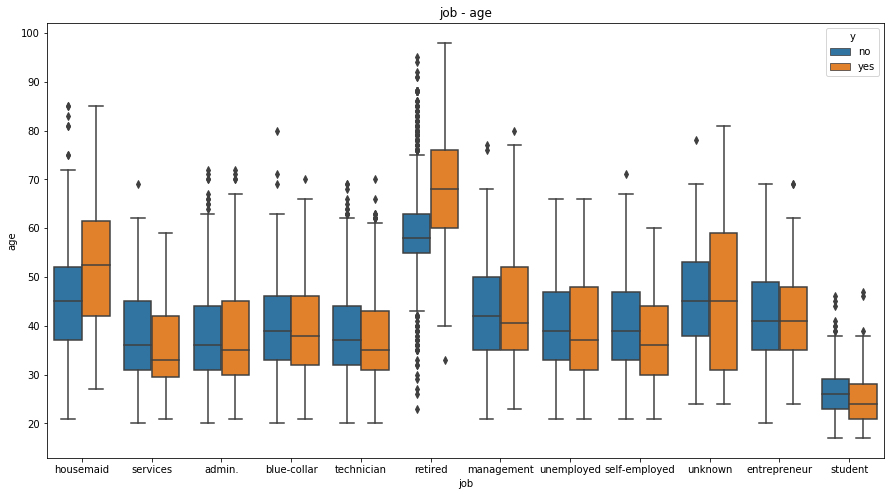

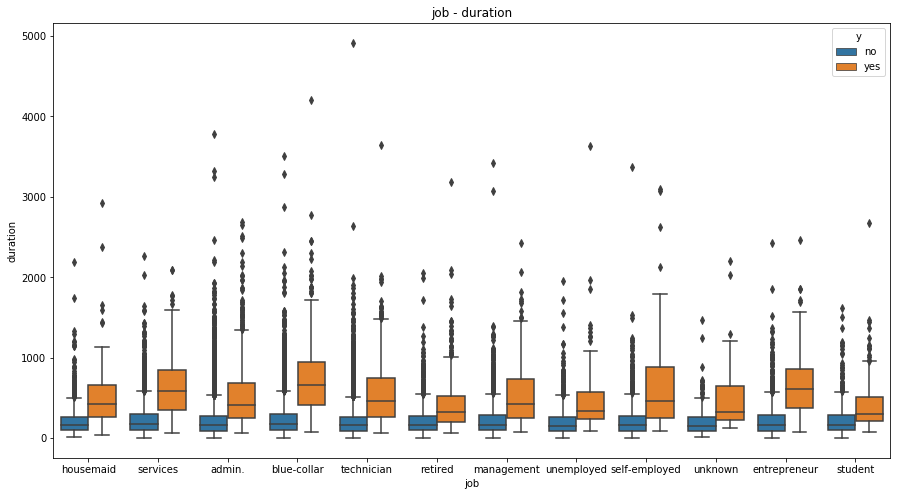

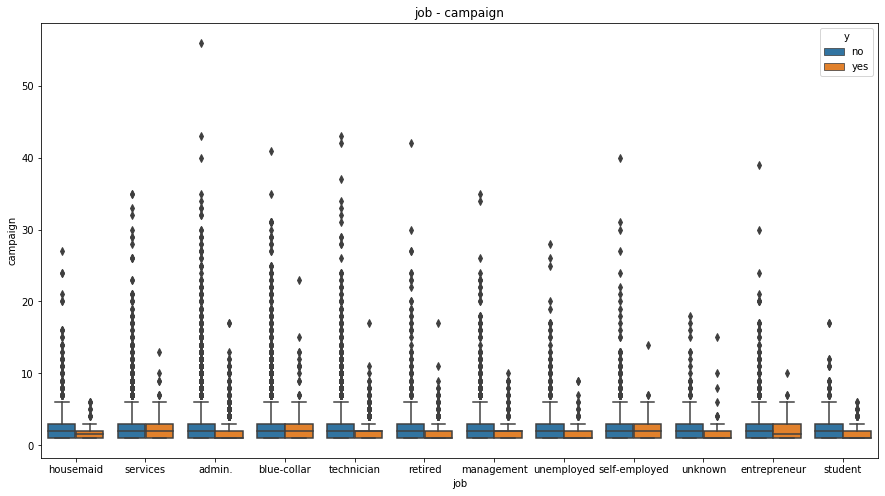

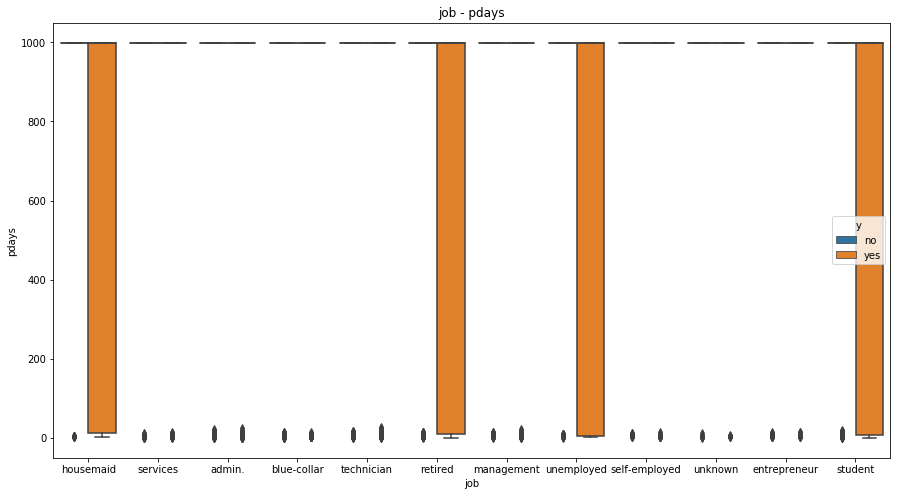

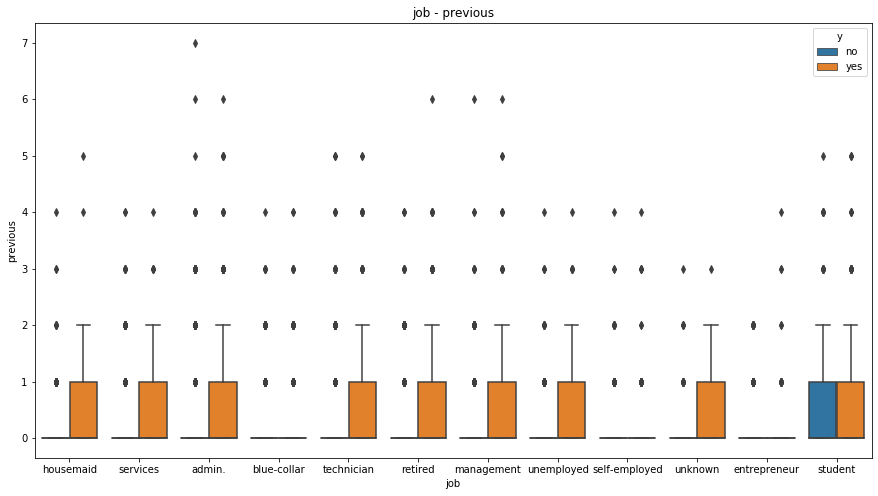

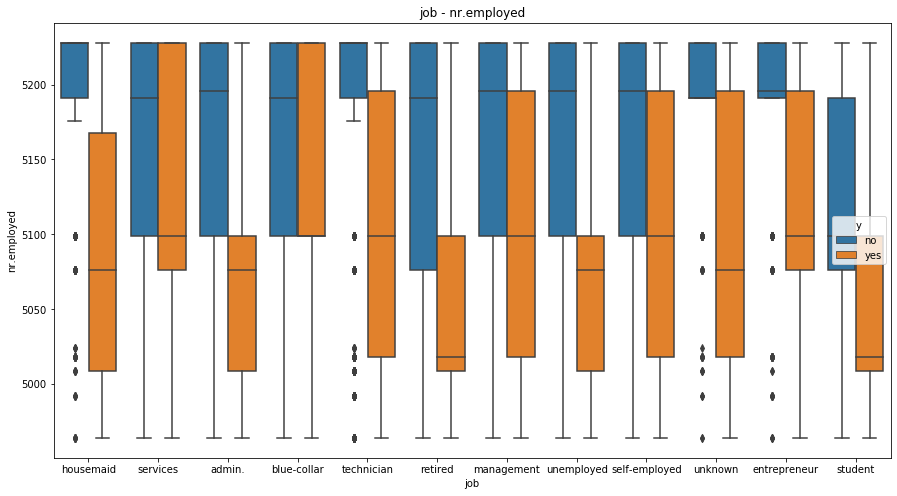

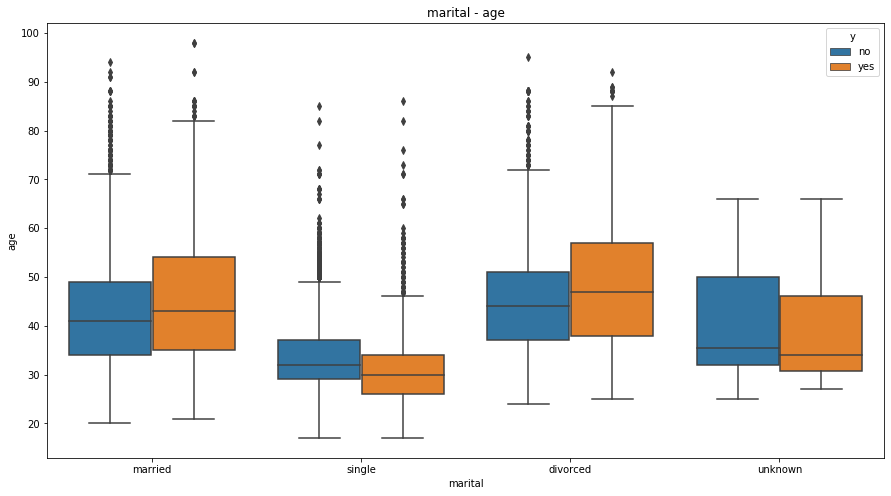

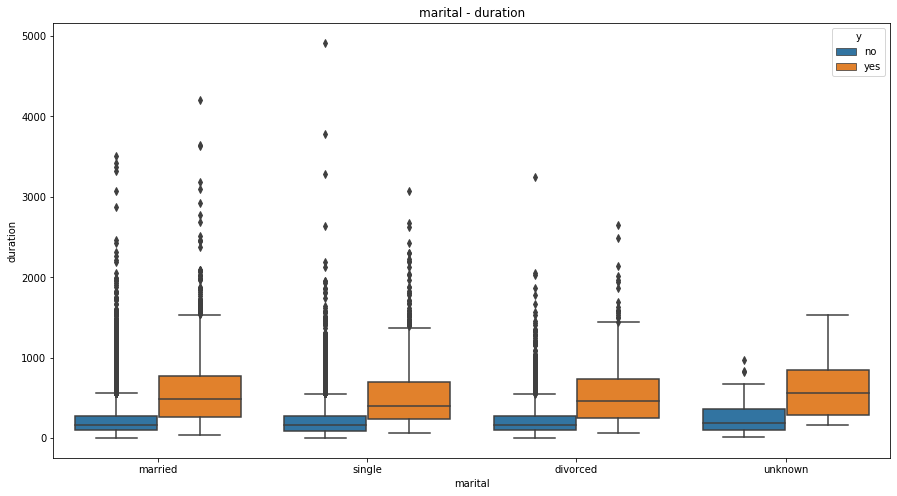

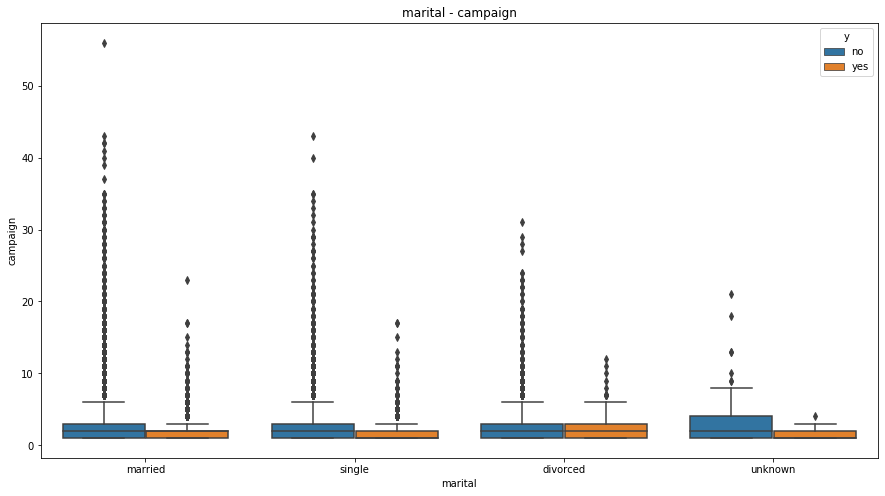

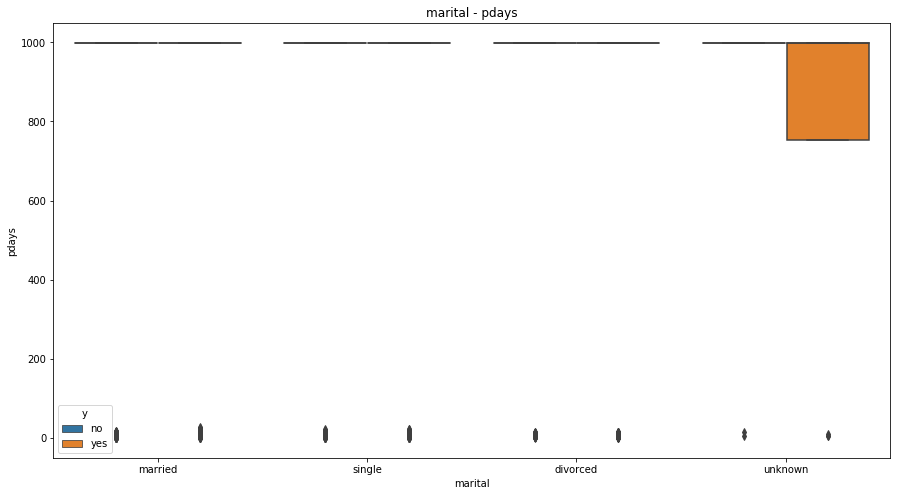

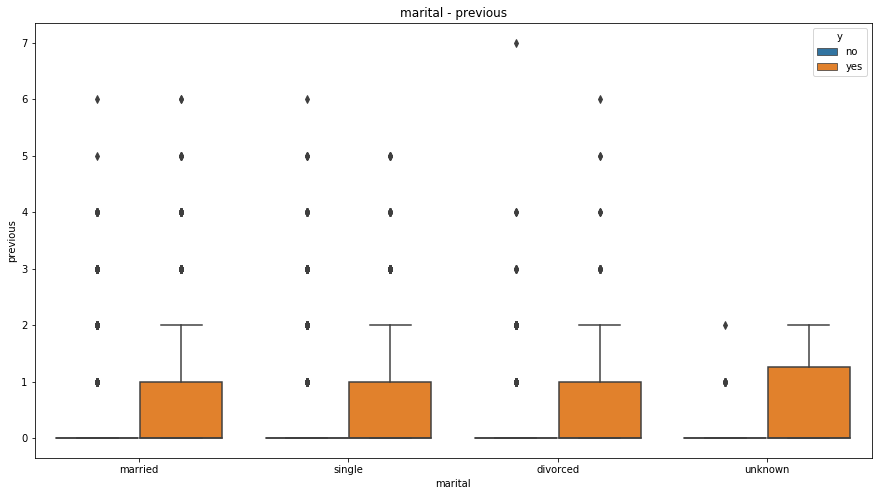

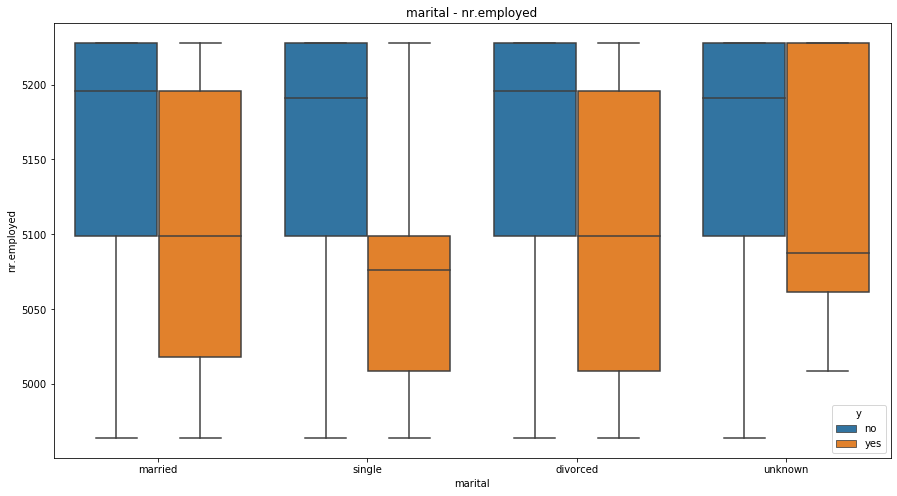

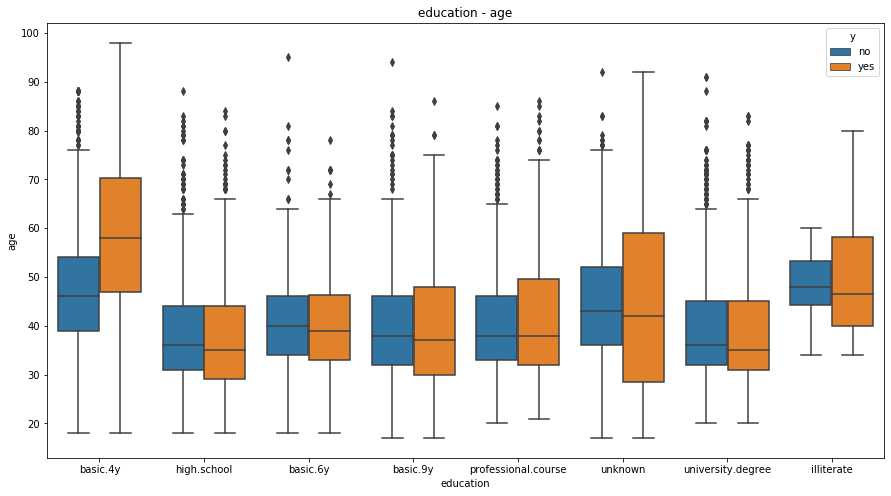

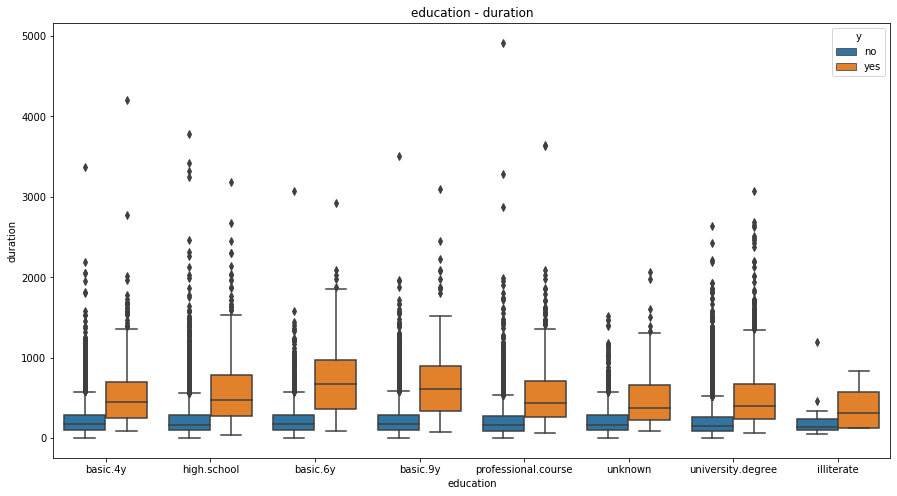

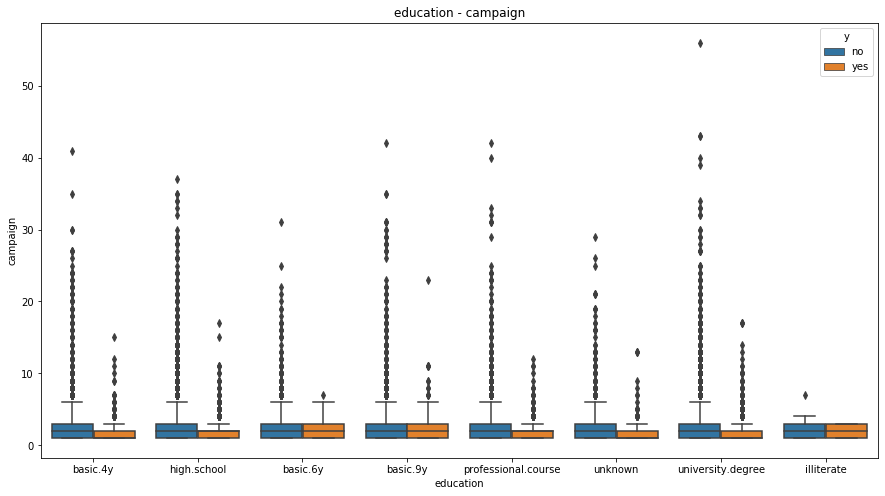

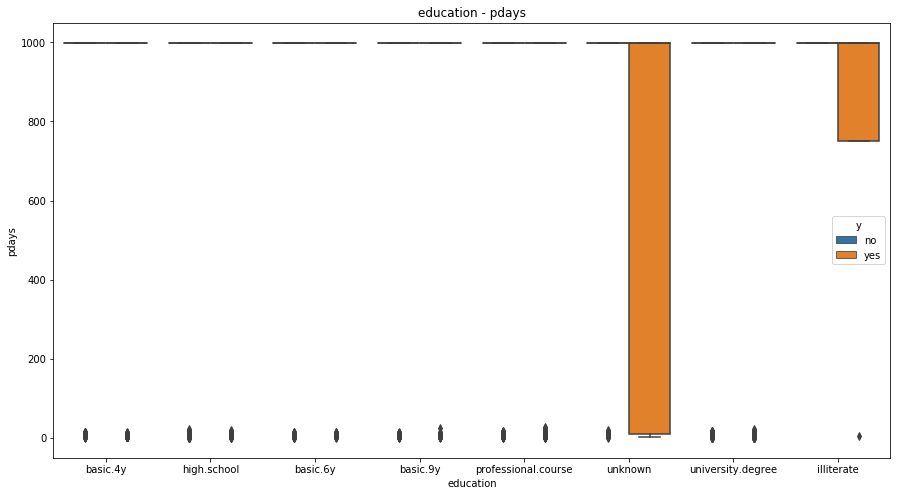

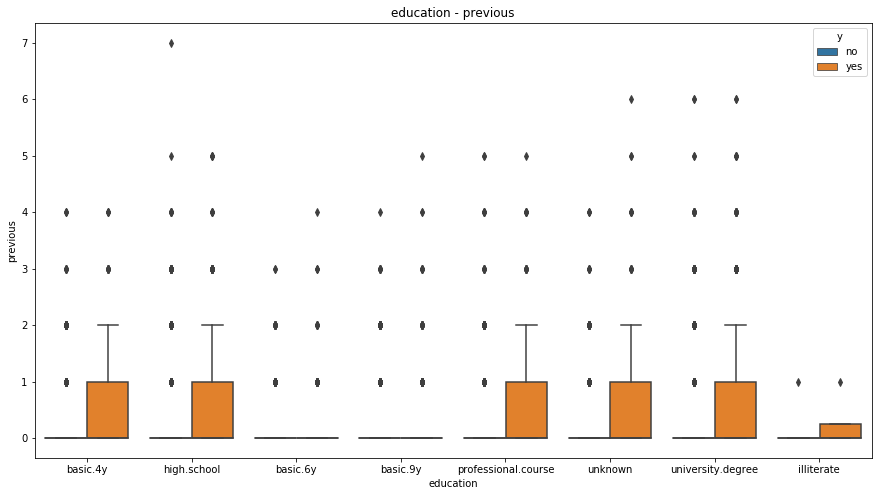

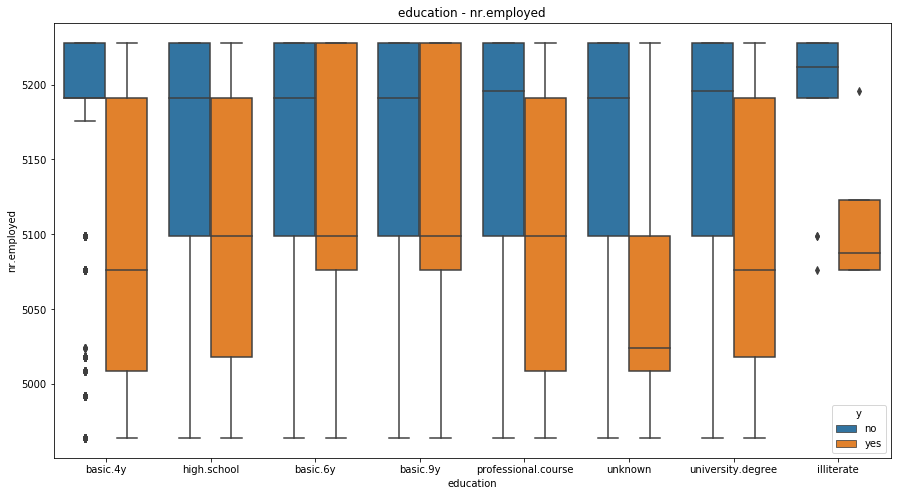

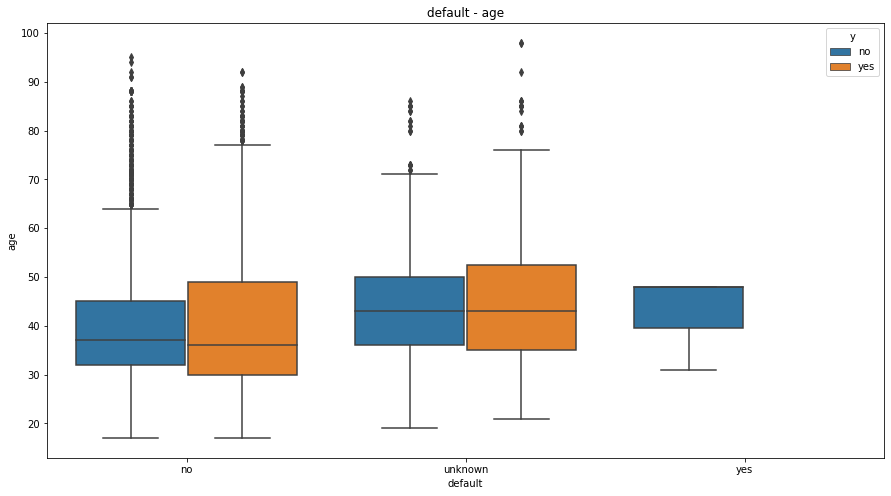

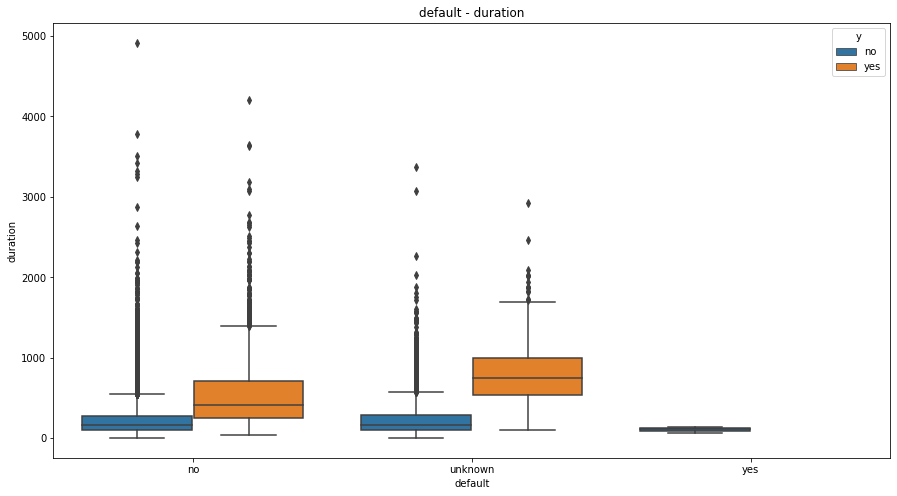

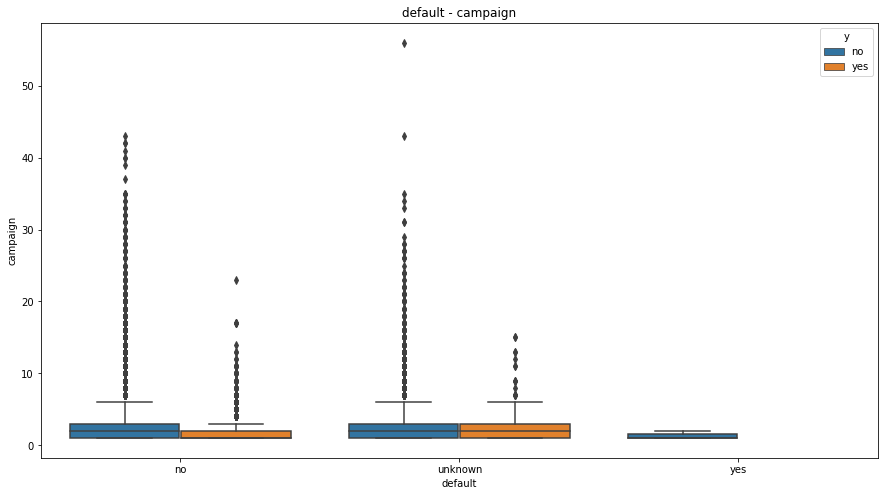

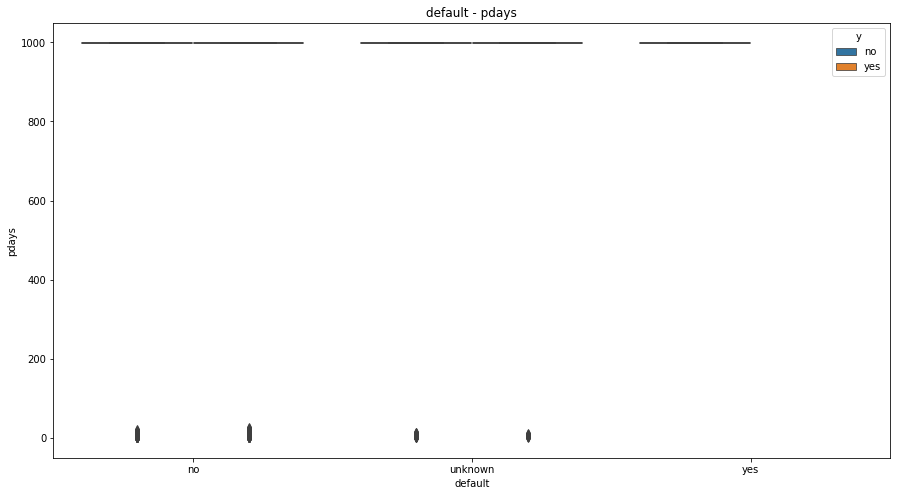

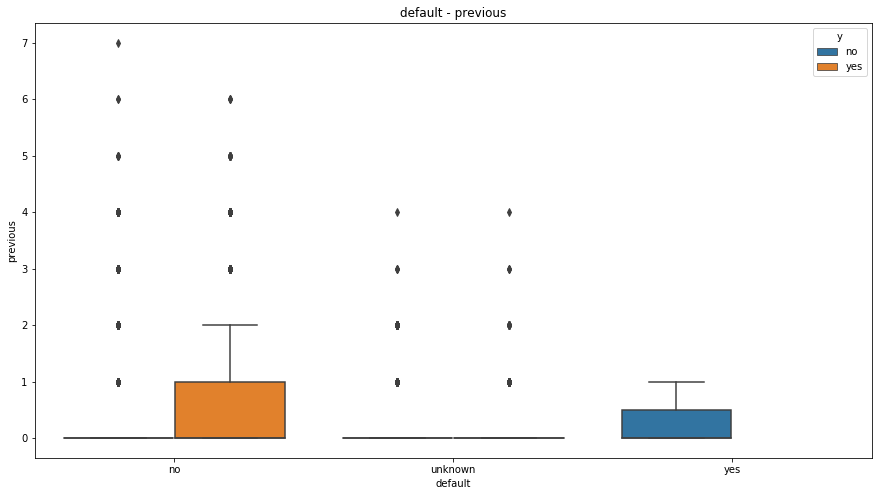

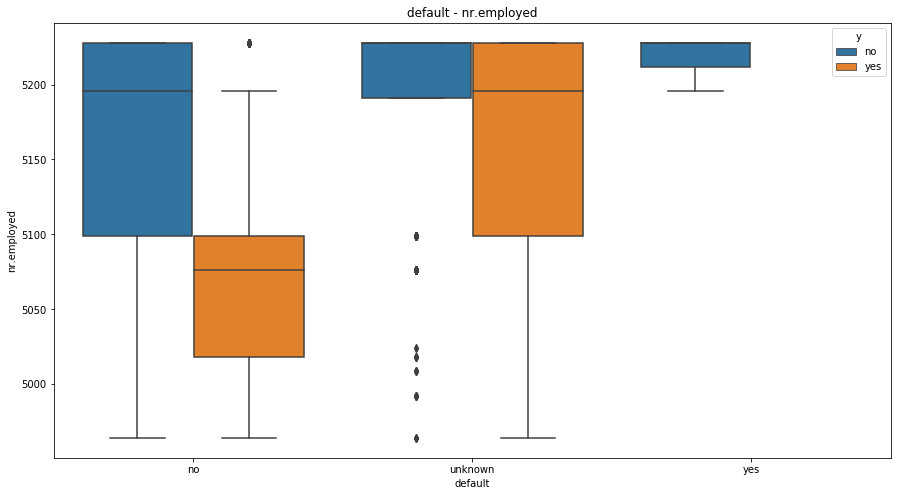

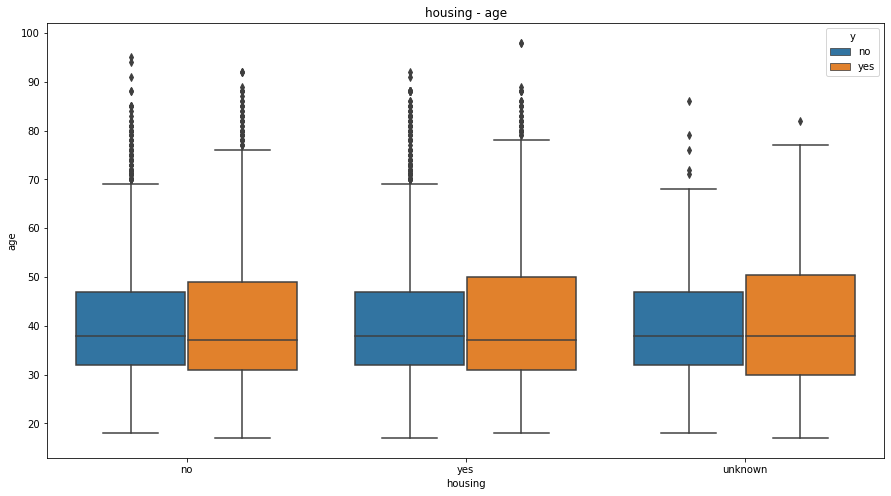

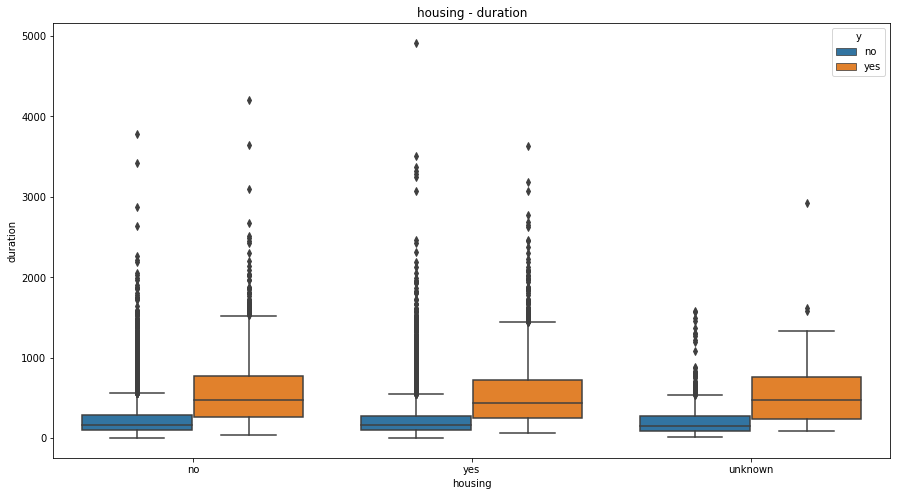

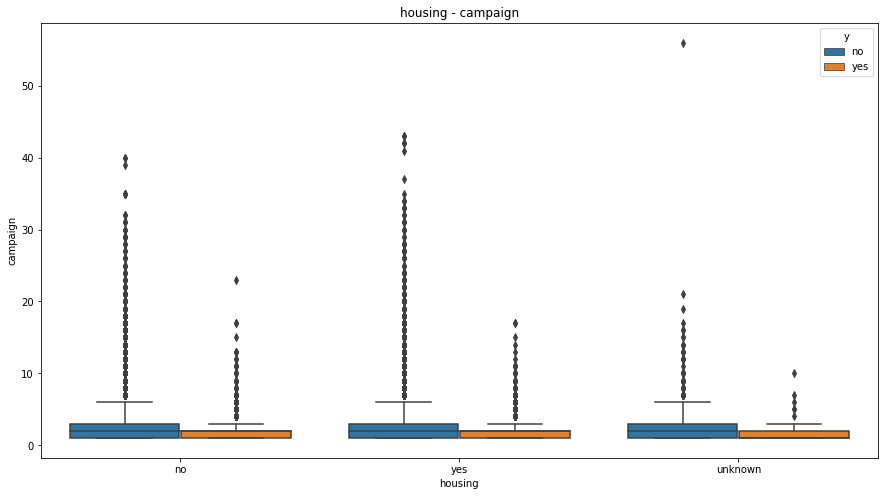

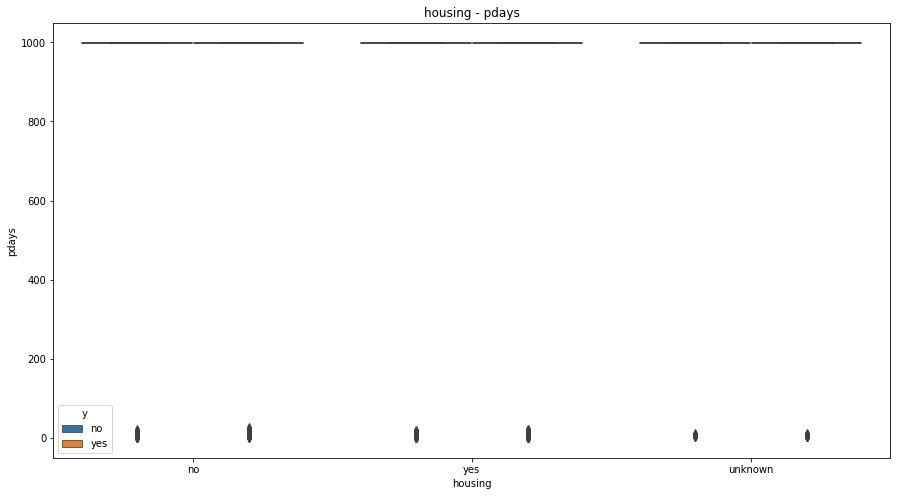

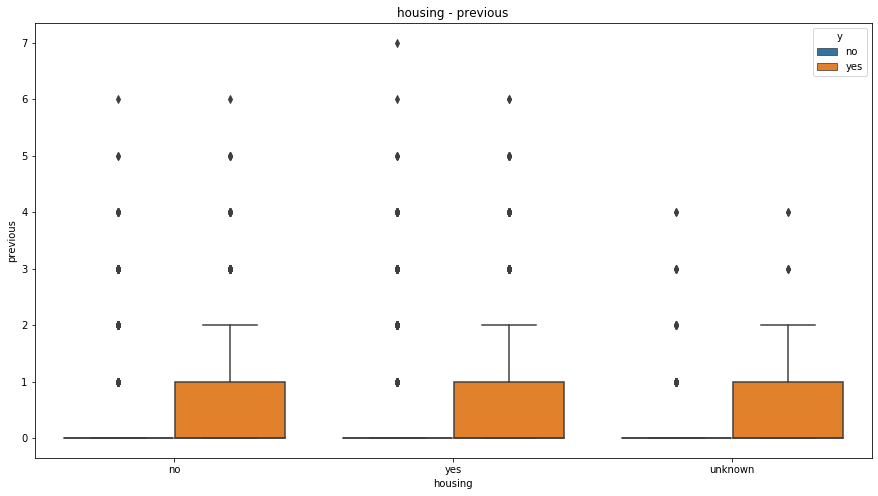

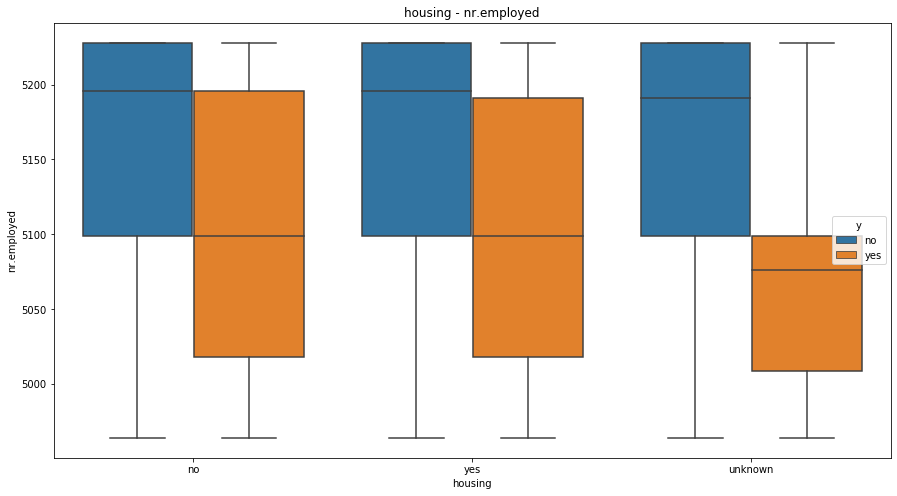

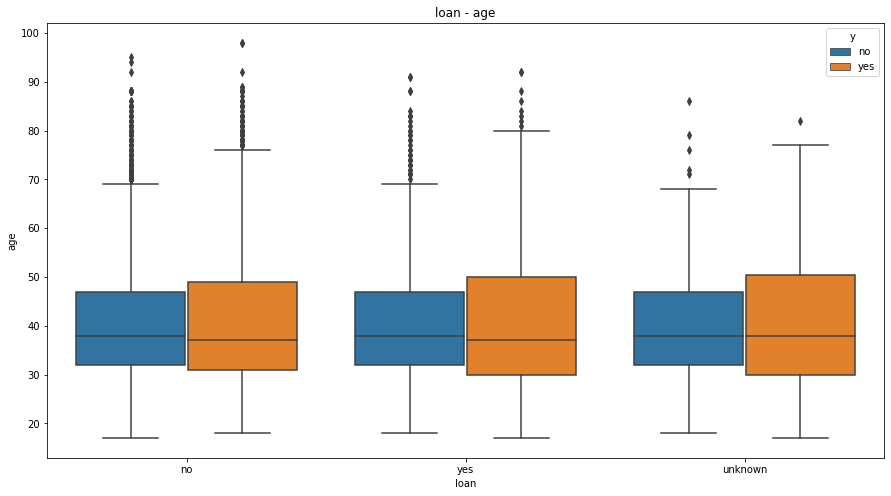

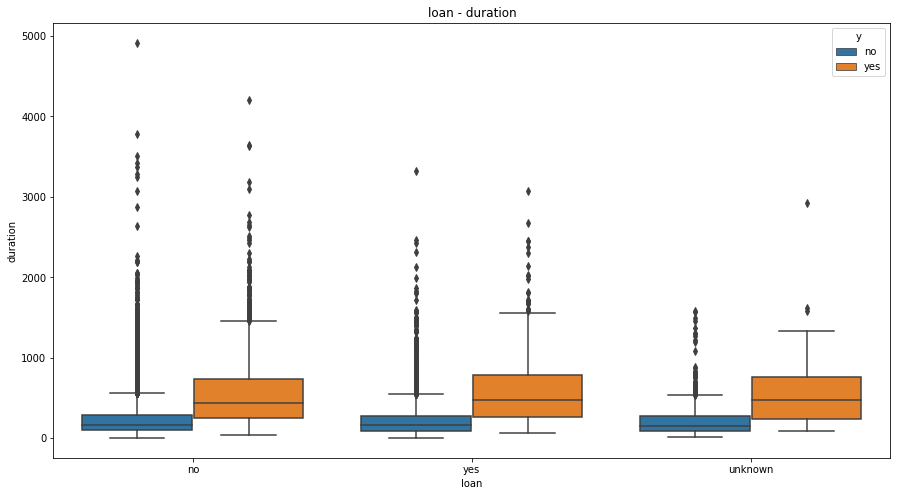

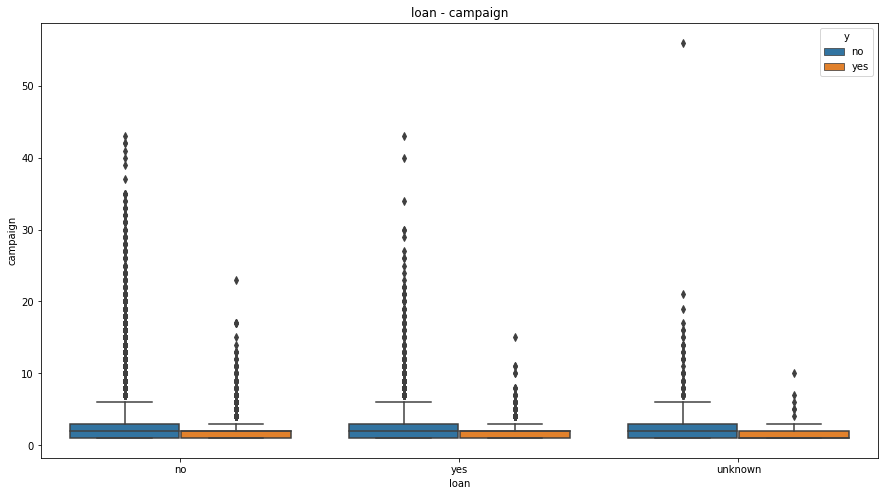

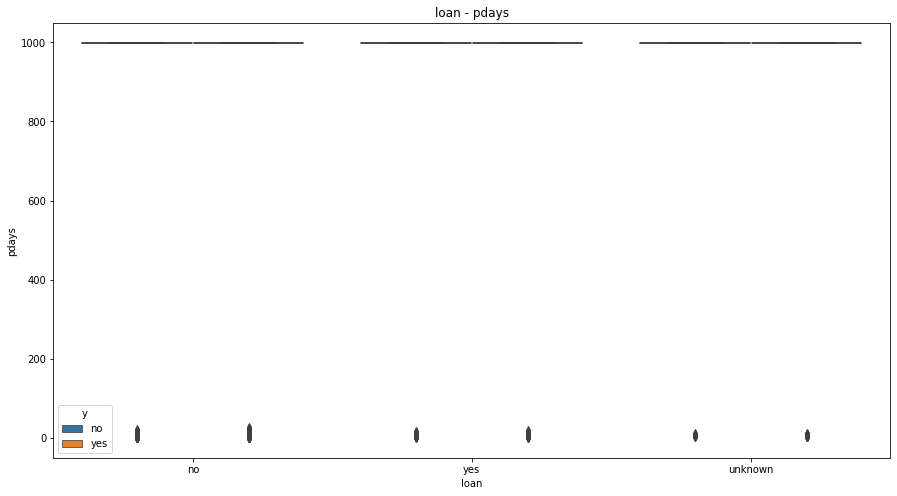

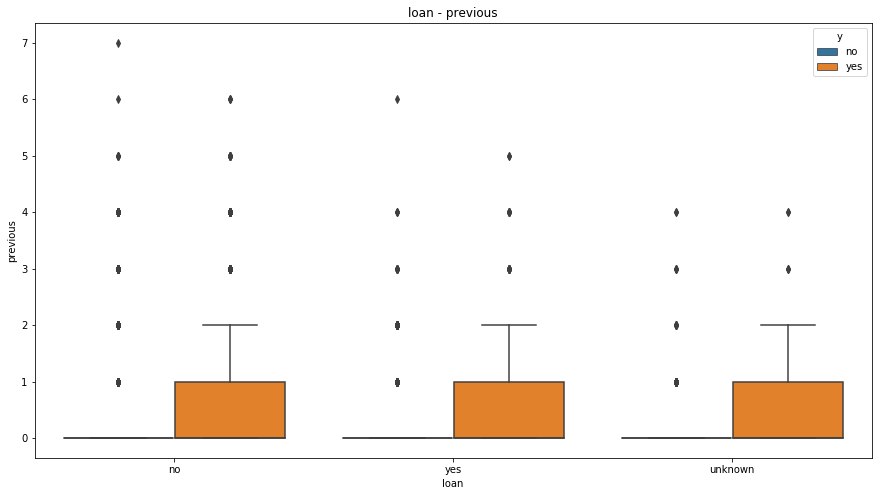

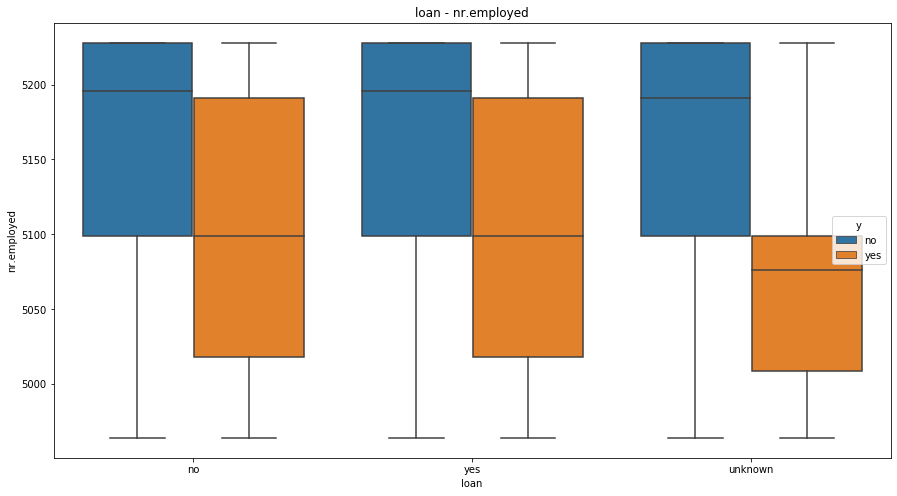

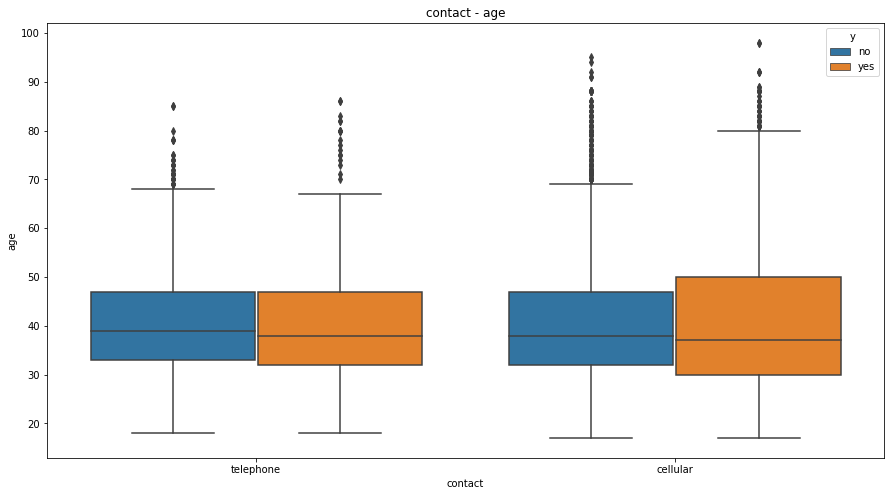

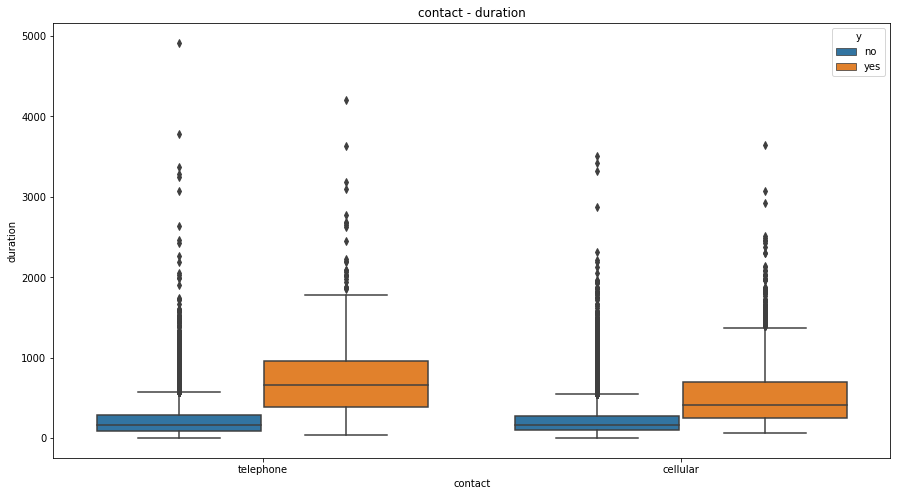

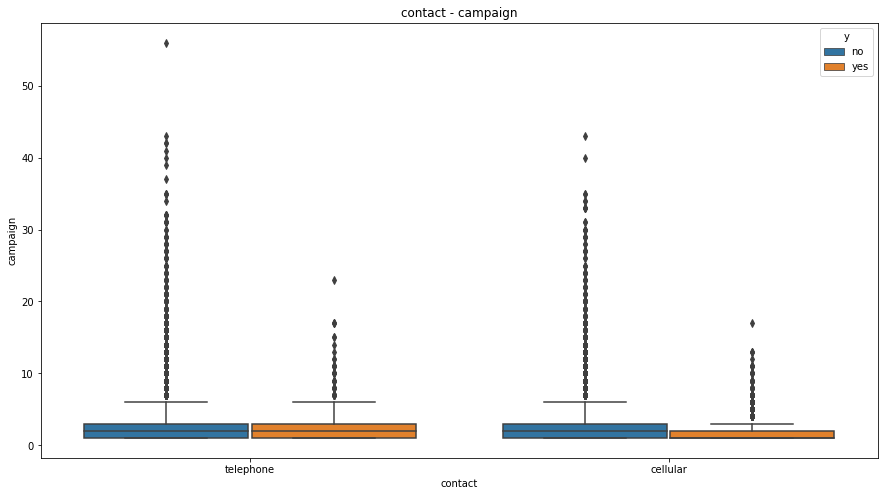

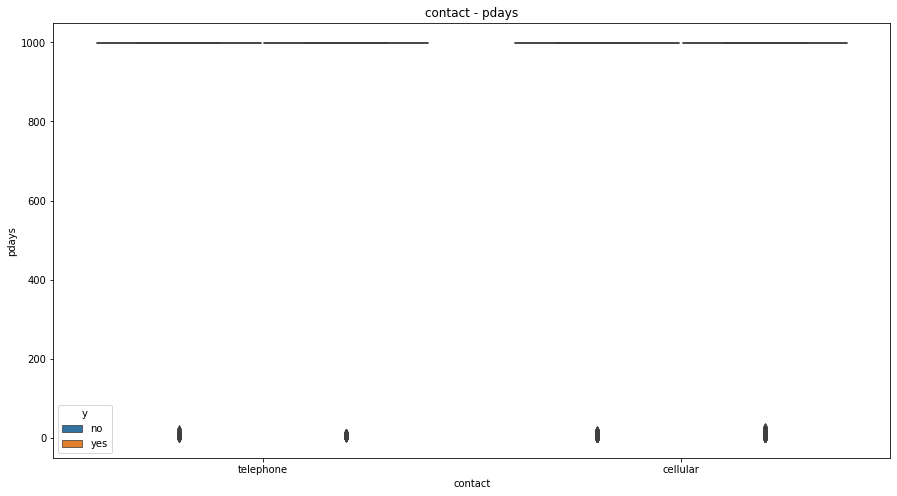

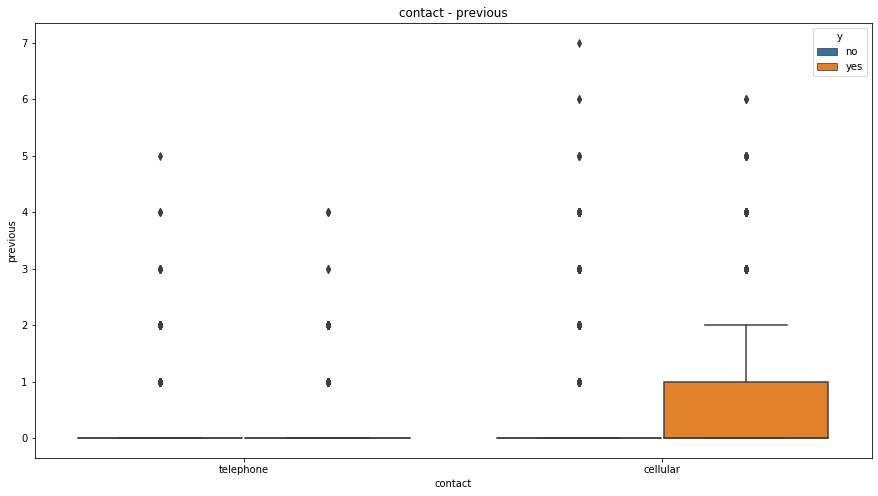

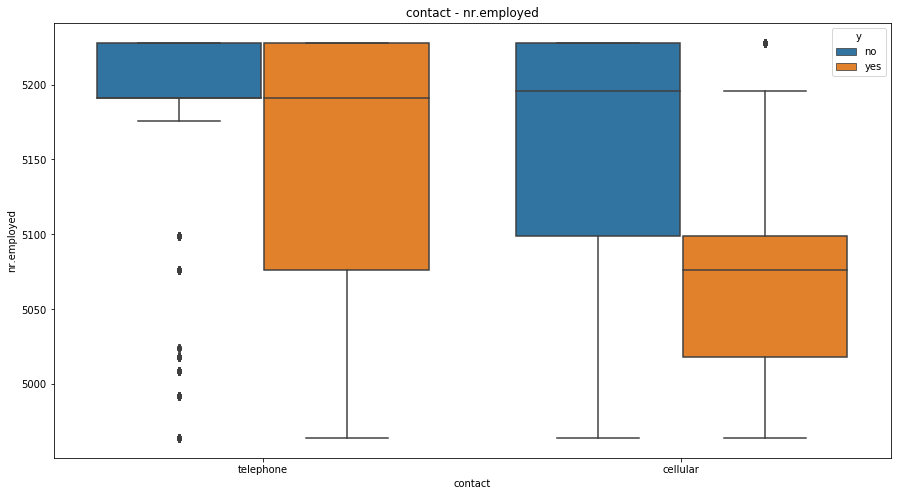

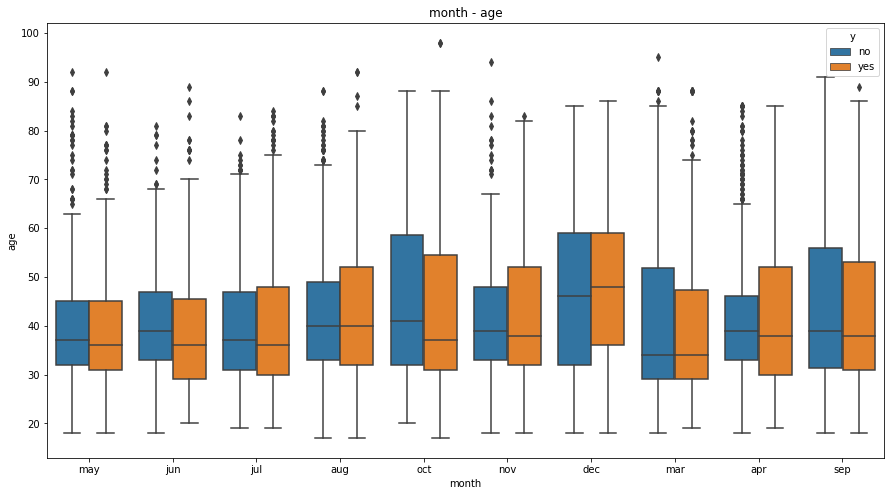

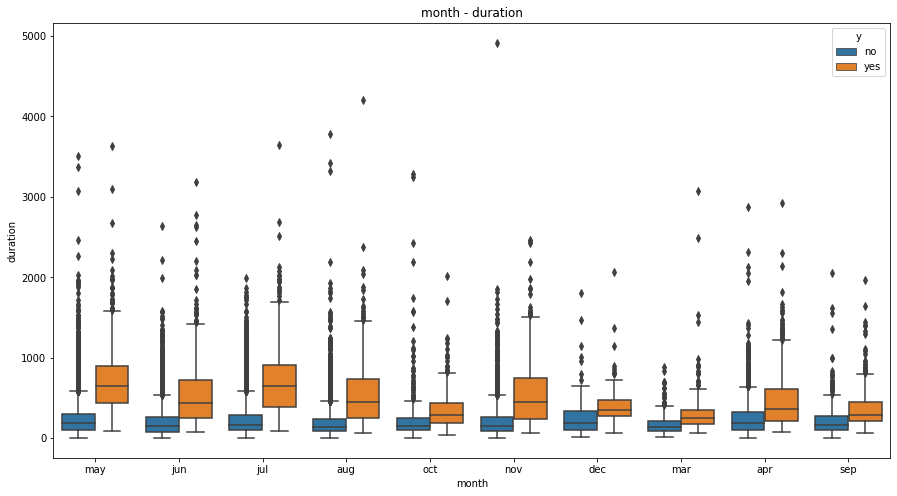

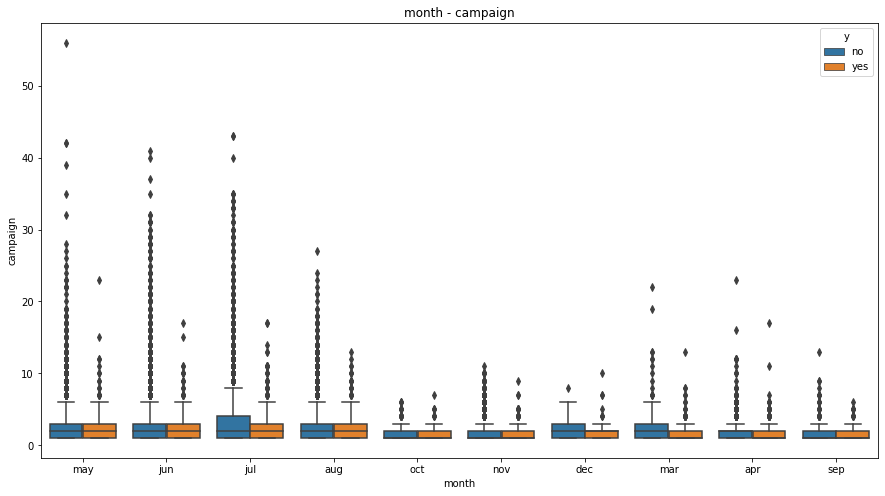

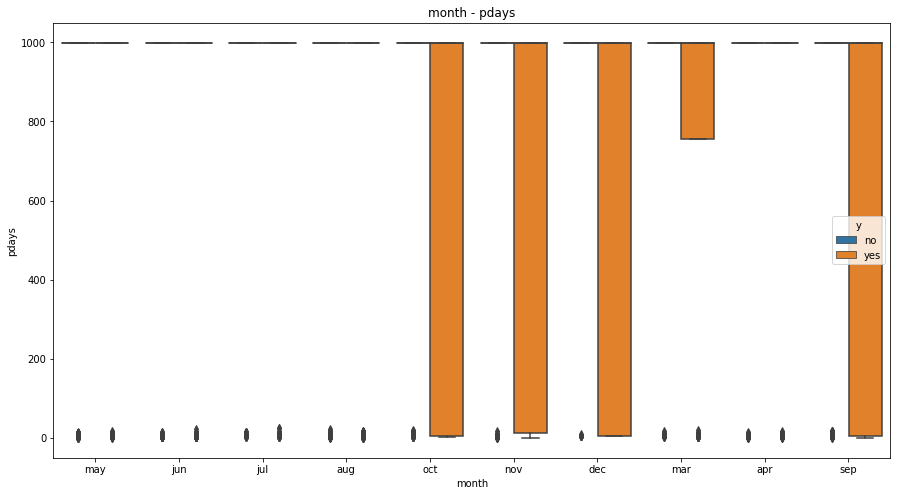

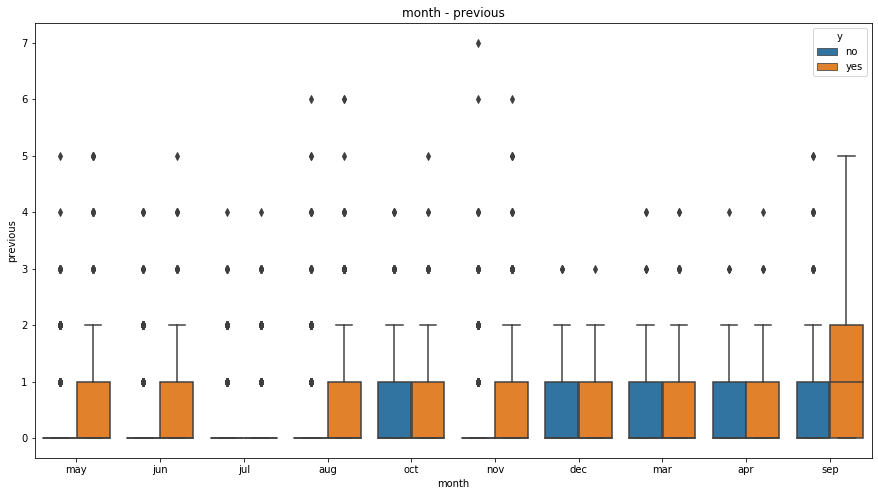

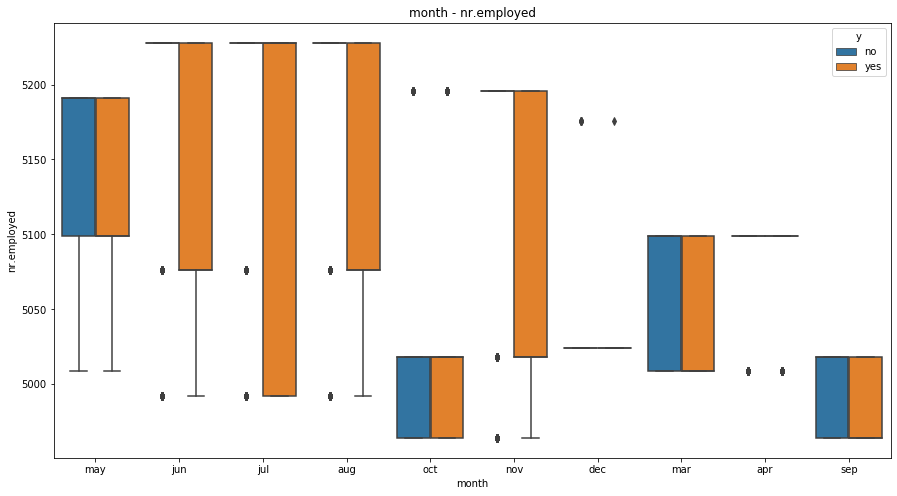

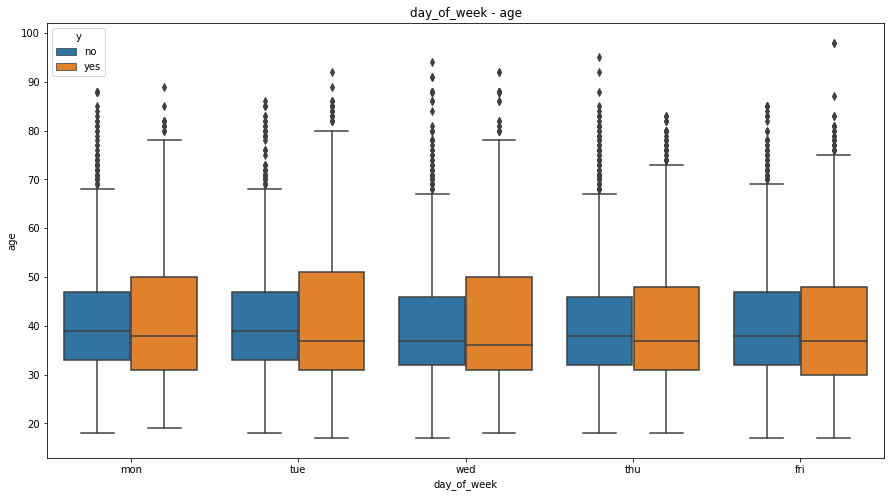

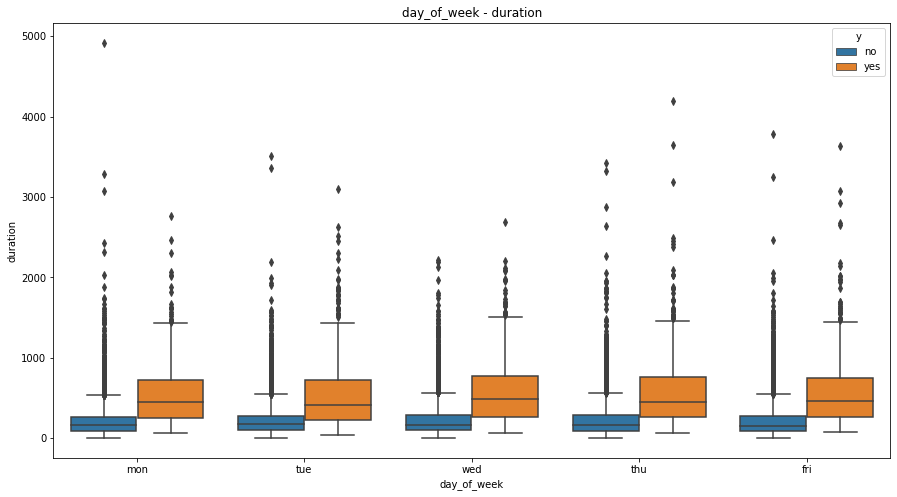

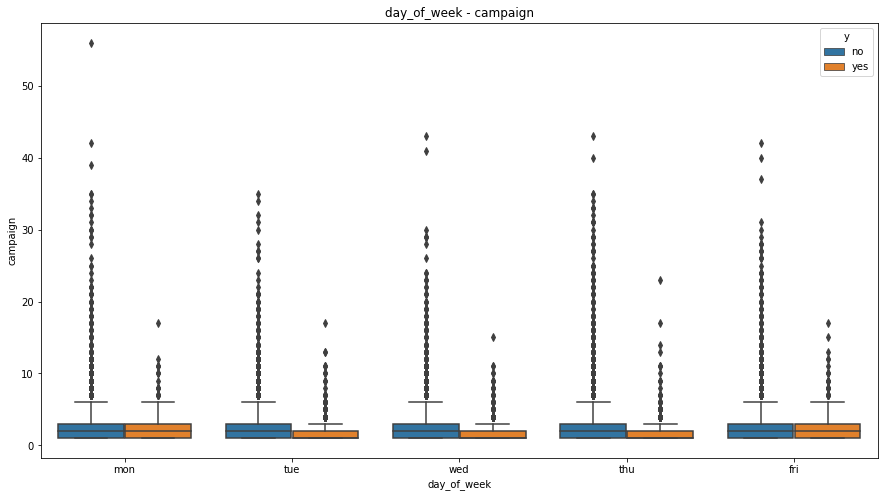

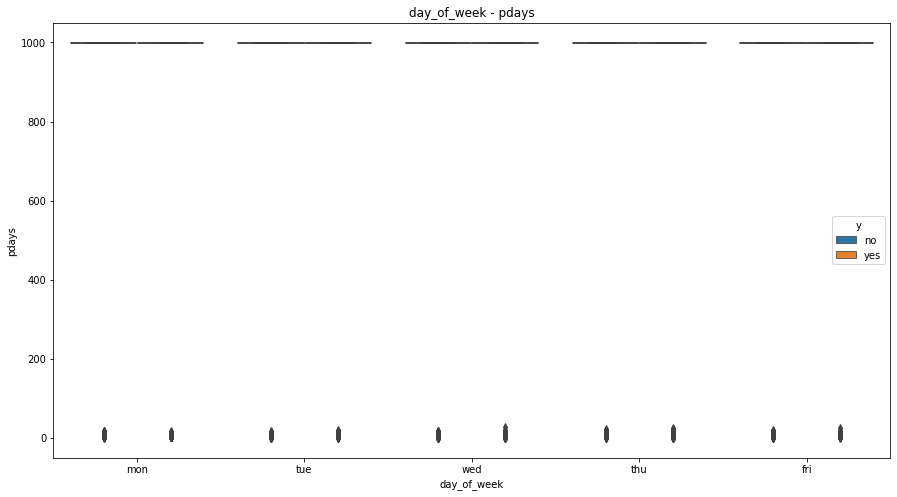

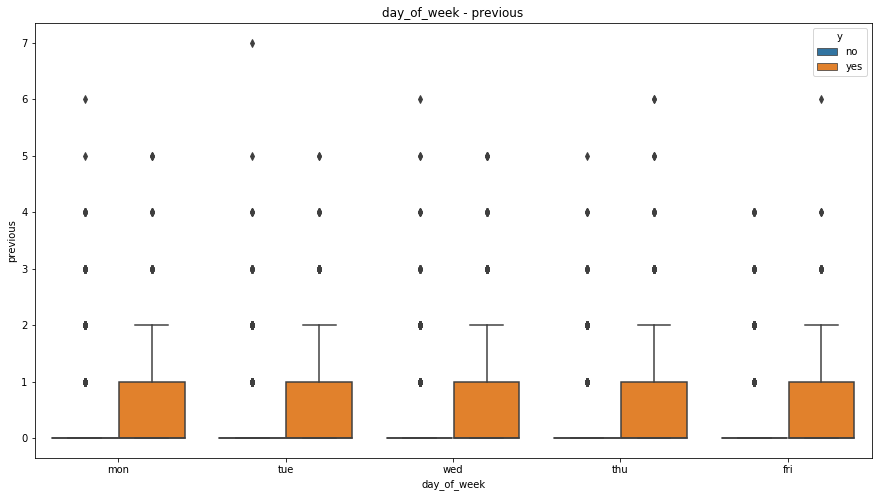

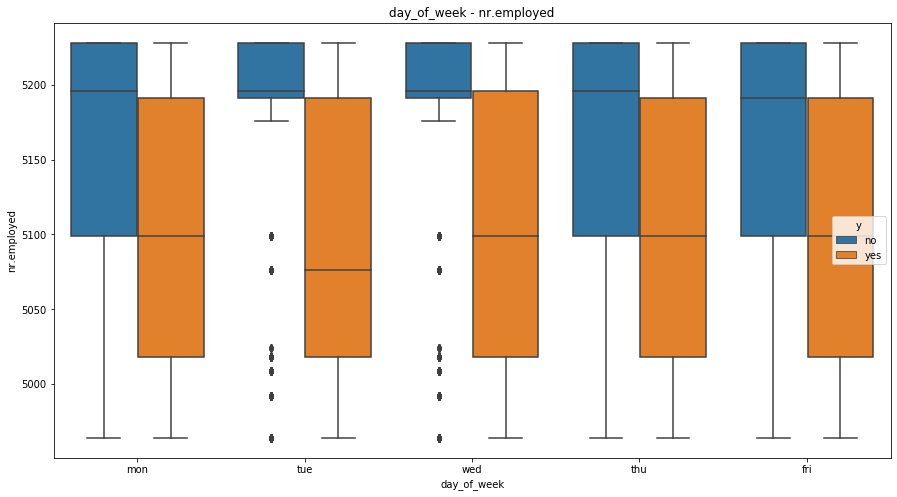

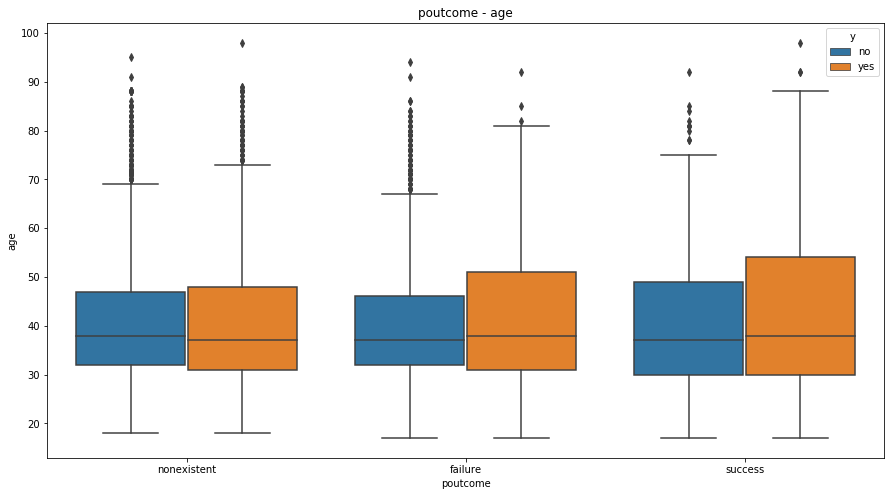

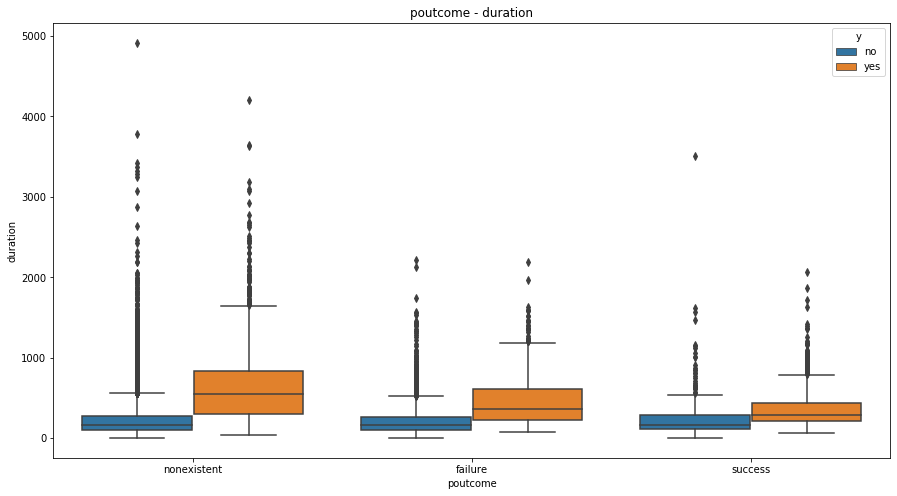

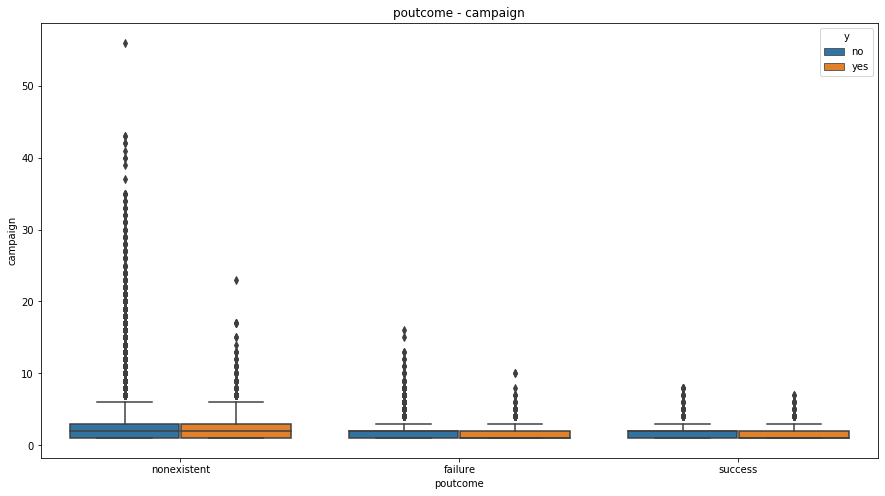

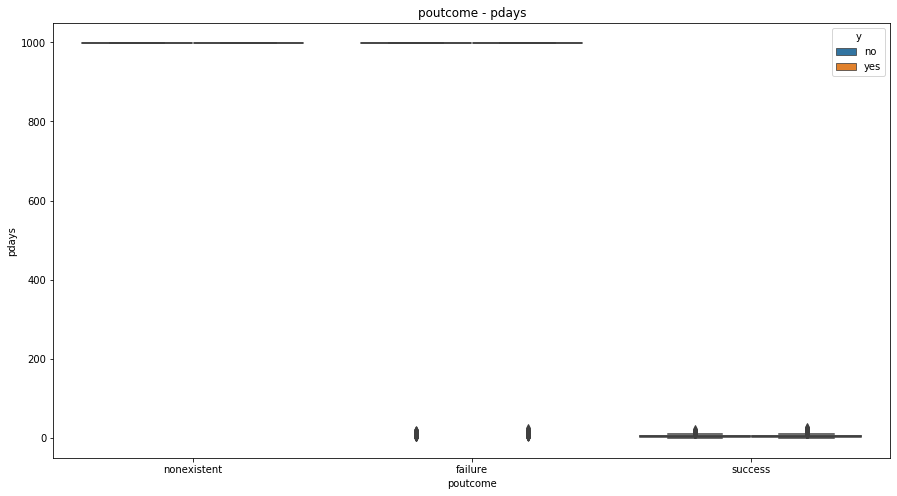

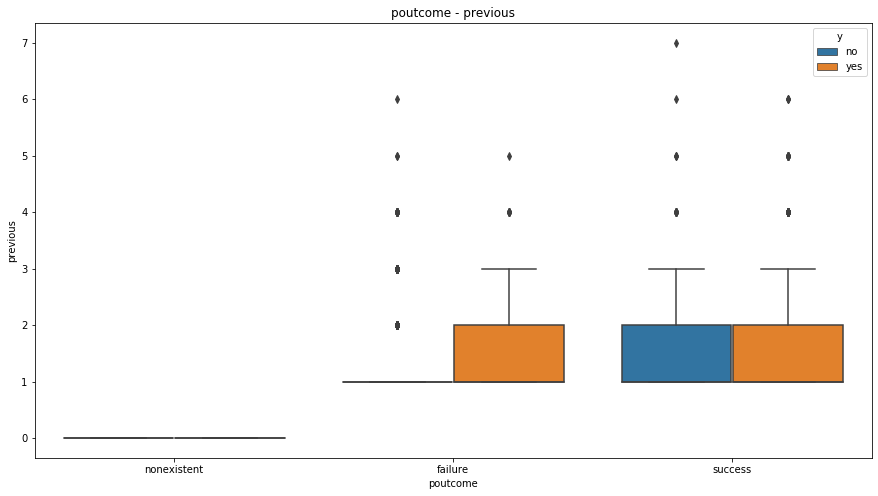

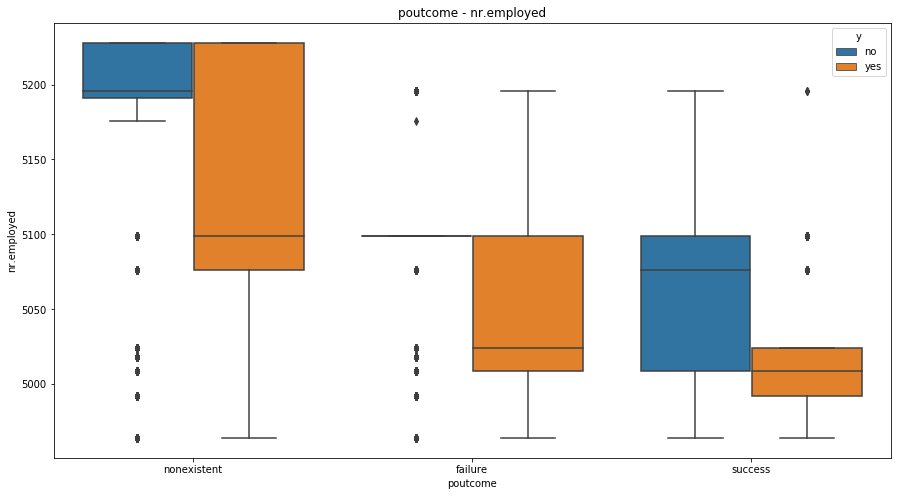

In [7]:
# check the relationship with categorical data and numerical data
def comp_cat_num(ca, nu):
    for col in ca:
        if col == 'y':
            continue
        for col2 in nu:
            plt.figure(figsize = (15, 8))
            sns.boxplot(x=col, y = col2, hue = 'y', data = df)
            plt.title('{} - {}' .format(col, col2))
            plt.show()


comp_cat_num(category_feature, numerical_feature)



In [8]:
df.drop(['euribor3m', 'nr.employed', 'pdays', 'previous', 'default'], axis=1, inplace=True)

In [9]:
numerical_feature = [col for col in df.columns if df[col].dtypes == 'int64']
category_feature = [col for col in df.columns if df[col].dtypes == 'object']

age 15.0
duration 217.0
campaign 2.0


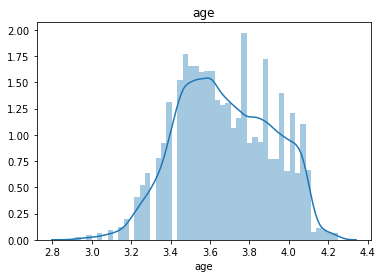

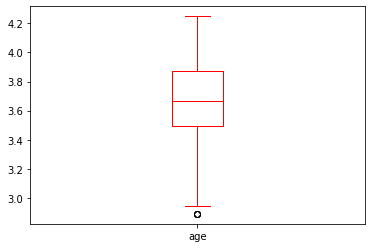

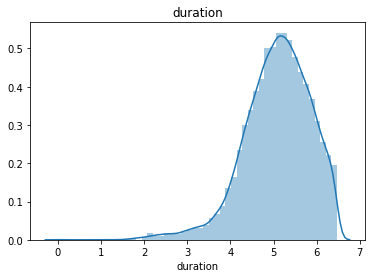

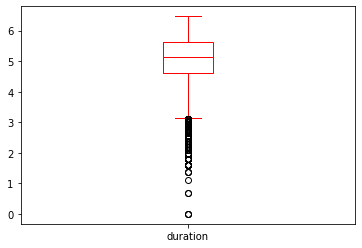

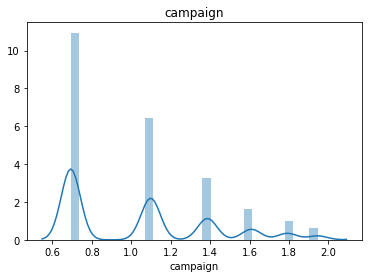

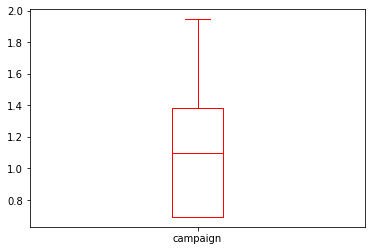

In [10]:
# remove the outlier of numerical data using IQR
for col in numerical_feature:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print(col, IQR)
    df =  df[(df[col] >= (Q1 - 1.5 * IQR))
            & (df[col] <= (Q3 + 1.5 * IQR))]
    
    df[col] = np.log1p(df[col]) # skewed data 

dist_box(df, numerical_feature)


C:\Users\tree9\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


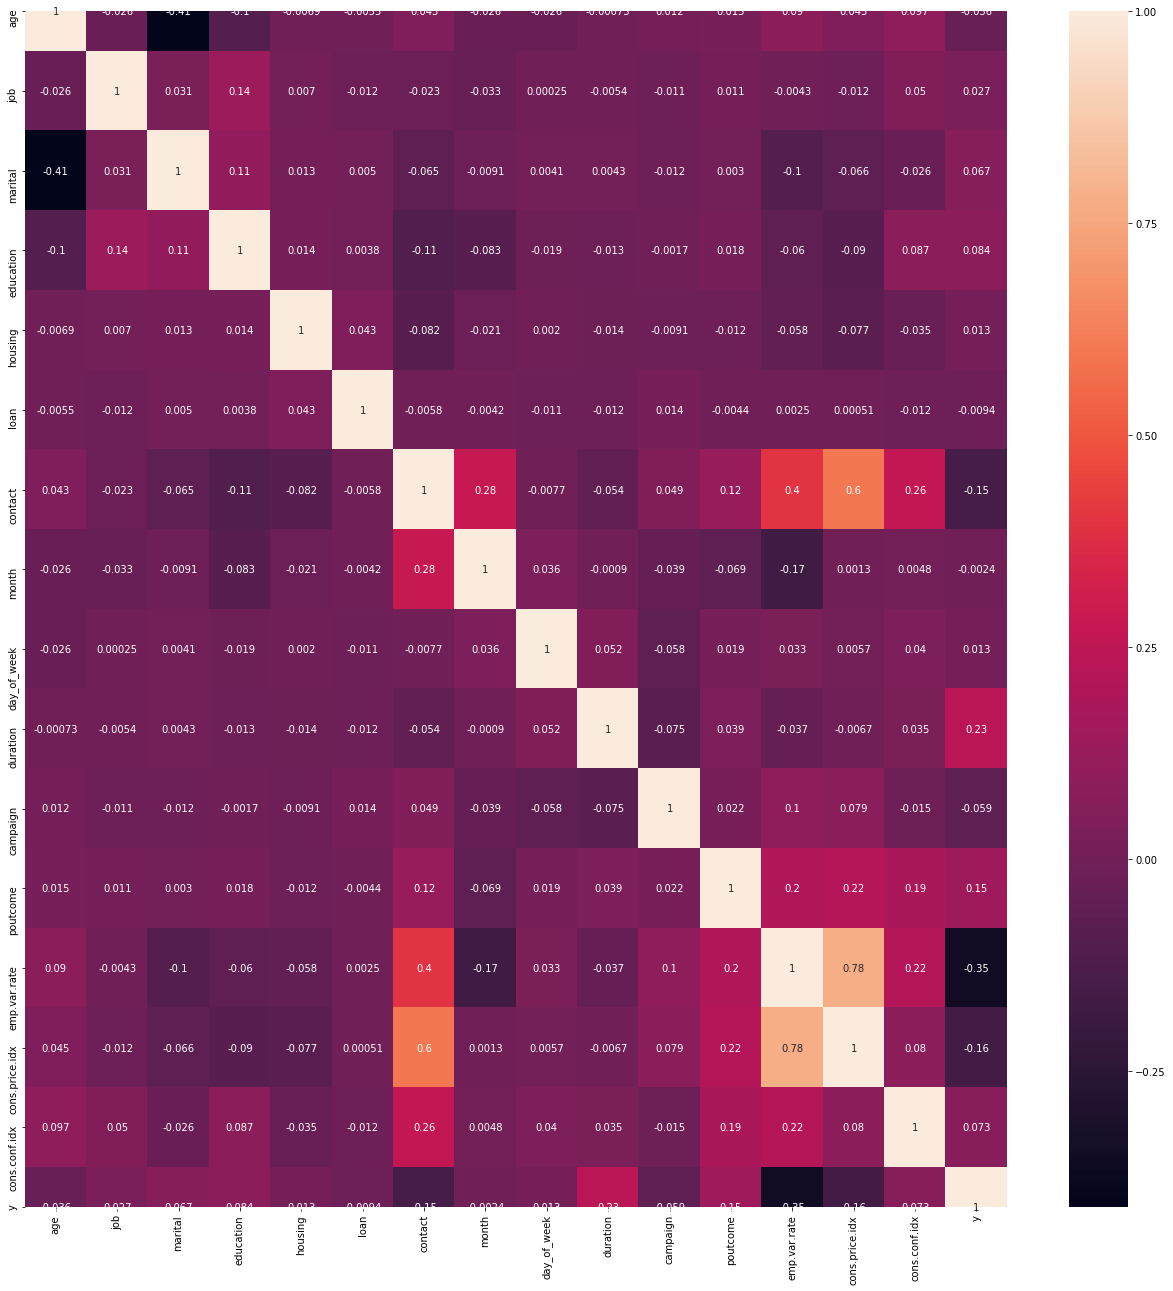

In [11]:
# Convert categorical data to numeric data using LabelEncoder
le = preprocessing.LabelEncoder()
for col in category_feature:
    df[[col]] = le.fit_transform(df[[col]])

# correlation
# calculate the correlation matrix
corr = df.corr()
# adjust matrix size to (12, 10)
plt.subplots( figsize =( 22 , 22 ) )
# plot the correlation heatmap
sns.heatmap(corr,
        annot=True,
        xticklabels=corr.columns,
        yticklabels=corr.columns)

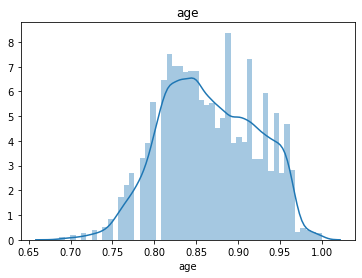

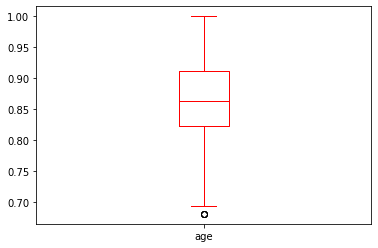

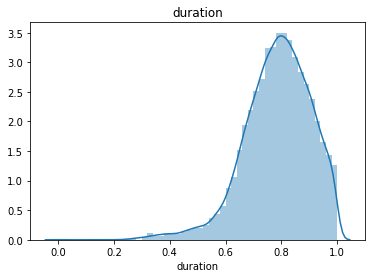

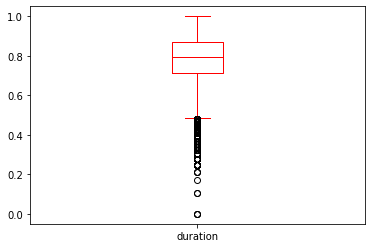

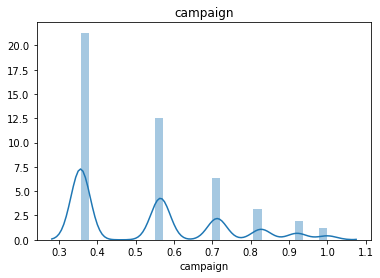

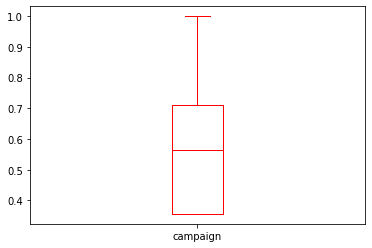

In [12]:
# X and y variables
X = df.drop(['y'], axis = 1)
y = df['y']

# re-scale
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler
#scaler = RobustScaler()
#scaler = MinMaxScaler()
scaler = MaxAbsScaler()
#scaler = StandardScaler()
X[numerical_feature] = scaler.fit_transform(X[numerical_feature])

# check distribution of numerical data
dist_box(X, numerical_feature)

# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state = 42)


In [13]:
print(y_train)

8520     0
34996    1
27345    0
22539    0
33708    0
        ..
19775    0
7041     0
13008    0
910      0
18524    0
Name: y, Length: 26651, dtype: int32


In [14]:
from imblearn.over_sampling import *

# Oversampling function
def overSampling(X_train, y_train):
    # Use ADASYN 
    X_resampled, y_resampled = ADASYN(random_state=0).fit_sample(X_train, y_train)    
    
    X_resampled = pd.DataFrame(X_resampled)
    y_resampled = pd.DataFrame(y_resampled)
     
    return X_resampled, y_resampled

# execute oversampling function
X_train,y_train=overSampling(X_train,y_train)

In [15]:
import itertools

# confusion matrix plot function
def plot_confusion_matrix(cm, target_names=None, cmap=None, normalize=True, labels=True, title='Confusion matrix'):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    # define properties of figure
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    # define thresh
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names)
        plt.yticks(tick_marks, target_names)
    
    # set number text of probabililty in confusion matrix
    if labels:
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            if normalize:
                plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")
            else:
                plt.text(j, i, "{:,}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()


In [16]:
from sklearn.model_selection import GridSearchCV

# Define parameters that is used in Logistic Regression
grid={
    "C":np.logspace(-3,3,7), 
    "penalty":["l1","l2"]
}
# Define Logistic Regression -> GridSearchCV
lr=LogisticRegression()
CV_lr=GridSearchCV(lr,grid, refit=True)

# Define parameters that is used in Random Forest
grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
# Define Random Forest -> GridSearchCV
rfc=RandomForestClassifier()
CV_rfc = GridSearchCV(estimator=rfc, param_grid=grid,refit=True)

# Define parameters that is used in SVM
grid = {
    'C':[0.001, 0.01, 0.1, 1, 10],
    'gamma':['auto'],
    'kernel':['rbf']
}
# Define SVM -> GridSearchCV
svm = SVC(probability=True)
CV_svm = GridSearchCV(estimator=svm, param_grid=grid, refit=True)


LR


C:\Users\tree9\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\tree9\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\tree9\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tree9\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\tree9\Anaconda3\lib\site-packages\sklearn\utils\validation.py

C:\Users\tree9\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\tree9\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tree9\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\tree9\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tree9\Anaconda3\lib\site-packages\sklearn\linear_

C:\Users\tree9\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\tree9\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\tree9\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tree9\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\tree9\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be ch

{'C': 1000.0, 'penalty': 'l2'}
f1_score: 0.6929363778865154
[[6737 1368]
 [  94  685]]


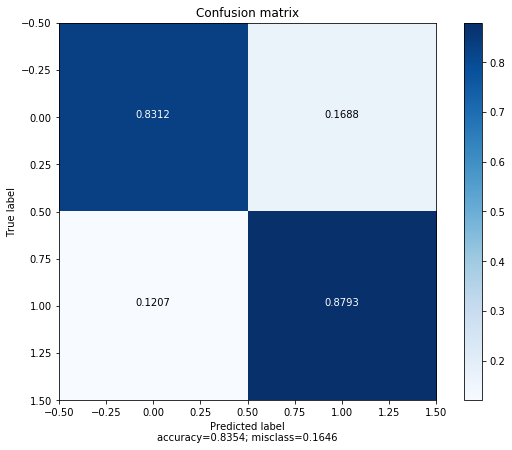

              precision    recall  f1-score   support

           0       0.99      0.83      0.90      8105
           1       0.33      0.88      0.48       779

    accuracy                           0.84      8884
   macro avg       0.66      0.86      0.69      8884
weighted avg       0.93      0.84      0.87      8884



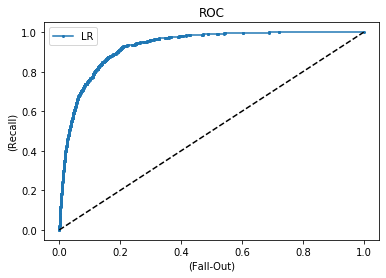

0.8354344889689329
--------------------------------------------------
RF


C:\Users\tree9\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\tree9\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\tree9\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\tree9\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected

C:\Users\tree9\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\tree9\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\tree9\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\tree9\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y wa

C:\Users\tree9\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\tree9\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\tree9\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\tree9\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y wa

C:\Users\tree9\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\tree9\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\tree9\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\tree9\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y wa

C:\Users\tree9\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\tree9\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\tree9\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\tree9\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y wa

C:\Users\tree9\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\tree9\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\tree9\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\tree9\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y wa

C:\Users\tree9\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\tree9\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\tree9\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\tree9\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y wa

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 200}
f1_score: 0.7409753142040255
[[7147  958]
 [ 117  662]]


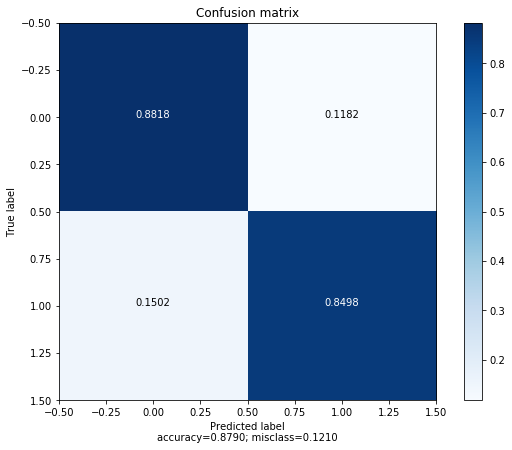

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      8105
           1       0.41      0.85      0.55       779

    accuracy                           0.88      8884
   macro avg       0.70      0.87      0.74      8884
weighted avg       0.93      0.88      0.90      8884



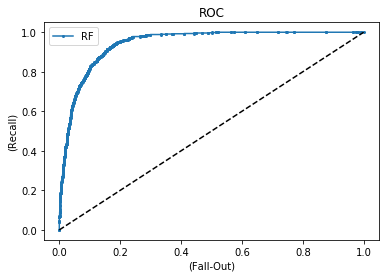

0.8789959477712742
--------------------------------------------------
SVM


C:\Users\tree9\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\tree9\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tree9\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tree9\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
f1_score: 0.7013671901412396
[[7241  864]
 [ 267  512]]


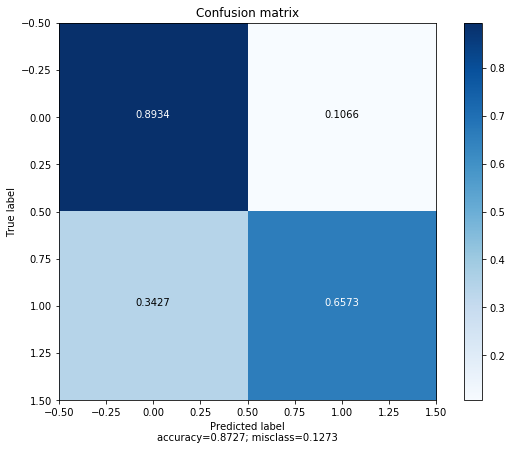

              precision    recall  f1-score   support

           0       0.96      0.89      0.93      8105
           1       0.37      0.66      0.48       779

    accuracy                           0.87      8884
   macro avg       0.67      0.78      0.70      8884
weighted avg       0.91      0.87      0.89      8884



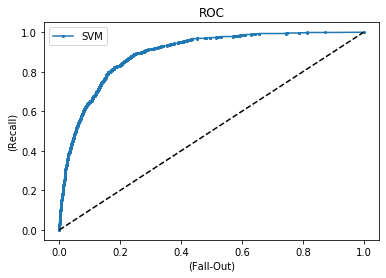

0.8726924808644755
--------------------------------------------------


In [17]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, f1_score

# to feed the random state
seed = 7

# prepare models
models = []
models.append(('LR', CV_lr))
models.append(('RF', CV_rfc))
models.append(('SVM', CV_svm))

for name, model in models:
    
    print(name)
    # Hold out 
    model.fit(X_train, y_train)
    print(model.best_params_)
    
    
    y_predict = pd.Series(model.predict(X_test))
    y_predict_proba = pd.Series(model.predict_proba(X_test)[:,1])

    # Resets index to compare original test data with predicted data
    y_test = y_test.reset_index(drop=True)
    y_predict = y_predict.reset_index(drop=True)
    
    # get f1 score and print
    print('f1_score:', f1_score(y_test, y_predict, average='macro'))
    
    # get confusion matrix and print using confusion matrix function
    cm = confusion_matrix(y_test, y_predict)
    print(cm)
    plot_confusion_matrix(np.array(cm))
    
    # classification report
    print(classification_report(y_test, y_predict))
    
    # get ROC curve and print
    fpr, tpr, thresholds = roc_curve(y_test, y_predict_proba)
    plt.plot(fpr, tpr, 'o-', ms=2, label=name)
    plt.legend()
    plt.plot([0, 1], [0, 1], 'k--', label="random guess")
    plt.xlabel('(Fall-Out)')
    plt.ylabel('(Recall)')
    plt.title('ROC')
    plt.show()
    
    # print simple score of model
    print(model.score(X_test, y_test))
    print('-' * 50)
